In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338"

/content/drive/.shortcut-targets-by-id/1z_ln8fPatUI4267ZmBksH4kCb2zS8RqM/EEG_GAN/datasets/datasets/ds002338


In [ ]:
!pip install mne
!pip install nibabel
!pip install nilearn
!pip install tensorflow==2.9.0
!pip install mne==0.23.4
!pip install nilearn==0.7.0
!pip install matplotlib==3.5.3
!pip install tensorflow-probability==0.12.2
!pip install tensorflow-determinism==0.3.0
!pip install tensorflow-addons==0.19.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 106.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: flatbuffers
    Foun

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: mne
    Found existing installation: mne 1.6.0
    Uninstalling mne-1.6.0:
      Successfully uninstalled mne-1.6.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: nilearn
    Found existing installation: nilearn 0.10.2
    Uninstalling nilearn-0.10.2:
      Successfully uninstalled nilearn-0.10.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.22.0
    Uninstalling tensorflow-probability-0.22.0:
      Successfully uninstalled tensorflow-probability-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires tensorflow-probability>=0.13.0, but you have tensorflow-probability 0.12.2 which is incompatible.
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-determinism: filename=tensorflow_determinism-0.3.0-py3-none-any.whl size=9139 sha256=e75cd9894fce255358753616c2bc39b4eeb766a3a5da226770bb9e0ee50cd8b3
  Stored in directory: /root/.cache/pip/wheels/ed/09/84/9e43798c7534d6fcd18416933d8762c8d74ec59cd914a8644b
Successfully built tensorflow-determinism
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Data Visualization

In [ ]:

import tensorflow as tf

import tensorflow_probability as tfp

import numpy as np



class DCT3D(tf.keras.layers.Layer):
	"""
	DCT3D - real Discrete Cosine Transform

	Performs the discrete cosine transform

	Example usage:
	>>> import numpy as np
	>>> import tensorflow as tf
	>>> import tensorflow_probability as tfp
	>>>
	>>> x = tf.constant(np.expand_dims(np.random.rand(16,10),axis=-1), dtype=tf.float32)
	>>> N = x.shape[1]
	>>> irdft = irDFT(N, out=N*2)
	>>> irdft(x)
	"""

	def __init__(self, N_1, N_2, N_3, **kwargs):

		self.N_1=N_1
		self.N_2=N_2
		self.N_3=N_3

		super(DCT3D, self).__init__(**kwargs)

	def build(self, input_shape):

		n1 = np.arange(self.N_1)
		k1 = n1.reshape((self.N_1,1))
		n2 = np.arange(self.N_2)
		k2 = n2.reshape((self.N_2,1))
		n3 = np.arange(self.N_3)
		k3 = n3.reshape((self.N_3,1))

		#variable initializer
		self.n1 = self.add_weight('n1',
								shape=[n1.shape[0]],
								initializer=tf.constant_initializer(n1),
								dtype=tf.float32,
								trainable=False)
		self.k1 = self.add_weight('k1',
								shape=[k1.shape[0], k1.shape[1]],
								initializer=tf.constant_initializer(k1),
								dtype=tf.float32,
								trainable=False)
		self.n2 = self.add_weight('n2',
								shape=[n2.shape[0]],
								initializer=tf.constant_initializer(n2),
								dtype=tf.float32,
								trainable=False)
		self.k2 = self.add_weight('k2',
								shape=[k2.shape[0], k2.shape[1]],
								initializer=tf.constant_initializer(k2),
								dtype=tf.float32,
								trainable=False)
		self.n3 = self.add_weight('n3',
								shape=[n3.shape[0]],
								initializer=tf.constant_initializer(n3),
								dtype=tf.float32,
								trainable=False)
		self.k3 = self.add_weight('k3',
								shape=[k3.shape[0], k3.shape[1]],
								initializer=tf.constant_initializer(k3),
								dtype=tf.float32,
								trainable=False)

		self.N1 = self.add_weight('N1',
								shape=[1],
								initializer=tf.constant_initializer(self.N_1),
								dtype=tf.float32,
								trainable=False)
		self.N2 = self.add_weight('N2',
								shape=[1],
								initializer=tf.constant_initializer(self.N_2),
								dtype=tf.float32,
								trainable=False)
		self.N3 = self.add_weight('N3',
								shape=[1],
								initializer=tf.constant_initializer(self.N_3),
								dtype=tf.float32,
								trainable=False)

	def call(self, x):
		z3 = 2*tf.tensordot((tf.cos(np.pi*(2*self.n3+1)*self.k3/(2*self.N3))), x, axes=[[1], [3]])
		z3 = tf.transpose(z3, [1,2,3,0])

		z2 = 2*tf.tensordot((tf.cos(np.pi*(2*self.n2+1)*self.k2/(2*self.N2))), z3, axes=[[1], [2]])
		z2 = tf.transpose(z2, [1,2,0,3])

		z1 = 2*tf.tensordot((tf.cos(np.pi*(2*self.n1+1)*self.k1/(2*self.N1))), z2, axes=[[1], [1]])
		z1 = tf.transpose(z1, [1,0,2,3])
		return z1

	def get_config(self):
		return {
			'N_1': self.N_1,
			'N_2': self.N_2,
			'N_3': self.N_3,
		}

	@classmethod
	def from_config(cls, config):
		return cls(**config)


class iDCT3D(tf.keras.layers.Layer):
	"""
	DCT3D - real Discrete Cosine Transform

	Performs the discrete cosine transform

	Example usage:
	>>> import numpy as np
	>>> import tensorflow as tf
	>>> import tensorflow_probability as tfp
	>>>
	>>> x = tf.constant(np.expand_dims(np.random.rand(16,10),axis=-1), dtype=tf.float32)
	>>> N = x.shape[1]
	>>> irdft = irDFT(N, out=N*2)
	>>> irdft(x)
	"""

	def __init__(self, N_1, N_2, N_3, **kwargs):

		self.N_1=N_1
		self.N_2=N_2
		self.N_3=N_3

		super(iDCT3D, self).__init__(**kwargs)

	def build(self, input_shape):

		n1 = np.arange(self.N_1)
		k1 = n1.reshape((self.N_1,1))
		n2 = np.arange(self.N_2)
		k2 = n2.reshape((self.N_2,1))
		n3 = np.arange(self.N_3)
		k3 = n3.reshape((self.N_3,1))

		#variable initializer
		self.n1 = self.add_weight('n1',
								shape=[n1.shape[0]],
								initializer=tf.constant_initializer(n1),
								dtype=tf.float32,
								trainable=False)
		self.k1 = self.add_weight('k1',
								shape=[k1.shape[0], k1.shape[1]],
								initializer=tf.constant_initializer(k1),
								dtype=tf.float32,
								trainable=False)
		self.n2 = self.add_weight('n2',
								shape=[n2.shape[0]],
								initializer=tf.constant_initializer(n2),
								dtype=tf.float32,
								trainable=False)
		self.k2 = self.add_weight('k2',
								shape=[k2.shape[0], k2.shape[1]],
								initializer=tf.constant_initializer(k2),
								dtype=tf.float32,
								trainable=False)
		self.n3 = self.add_weight('n3',
								shape=[n3.shape[0]],
								initializer=tf.constant_initializer(n3),
								dtype=tf.float32,
								trainable=False)
		self.k3 = self.add_weight('k3',
								shape=[k3.shape[0], k3.shape[1]],
								initializer=tf.constant_initializer(k3),
								dtype=tf.float32,
								trainable=False)

		self.N1 = self.add_weight('N1',
								shape=[1],
								initializer=tf.constant_initializer(self.N_1),
								dtype=tf.float32,
								trainable=False)
		self.N2 = self.add_weight('N2',
								shape=[1],
								initializer=tf.constant_initializer(self.N_2),
								dtype=tf.float32,
								trainable=False)
		self.N3 = self.add_weight('N3',
								shape=[1],
								initializer=tf.constant_initializer(self.N_3),
								dtype=tf.float32,
								trainable=False)

		#remove this
		norm3 = np.ones((self.N_1,self.N_2,self.N_3))
		norm3[:,:,1:] = 2
		norm2 = np.ones((self.N_1,self.N_2,self.N_3))
		norm2[:,1:,:] = 2
		norm1 = np.ones((self.N_1,self.N_2,self.N_3))
		norm1[1:,:,:] = 2

		self.norm1 = self.add_weight('norm1',
								shape=[self.N_1,self.N_2,self.N_3],
								initializer=tf.constant_initializer(norm1),
								dtype=tf.float32,
								trainable=False)
		self.norm2 = self.add_weight('norm2',
								shape=[self.N_1,self.N_2,self.N_3],
								initializer=tf.constant_initializer(norm2),
								dtype=tf.float32,
								trainable=False)
		self.norm3 = self.add_weight('norm3',
								shape=[self.N_1,self.N_2,self.N_3],
								initializer=tf.constant_initializer(norm3),
								dtype=tf.float32,
								trainable=False)

	def call(self, x):
		z3 = (1/(2*self.N3))*tf.tensordot((tf.cos(np.pi*self.n3*(2*self.k3+1)/(2*self.N3))), x*self.norm3,
										  axes=[[1], [3]])
		z3 = tf.transpose(z3, [1,2,3,0])

		z2 = (1/(2*self.N2))*tf.tensordot((tf.cos(np.pi*self.n2*(2*self.k2+1)/(2*self.N2))), z3*self.norm2,
										  axes=[[1], [2]])
		z2= tf.transpose(z2, [1,2,0,3])

		z1 = (1/(2*self.N1))*tf.tensordot((tf.cos(np.pi*self.n1*(2*self.k1+1)/(2*self.N1))), z2*self.norm1,
										  axes=[[1], [1]])

		return tf.transpose(z1, [1,0,2,3])

	def get_config(self):
		return {
			'N_1': self.N_1,
			'N_2': self.N_2,
			'N_3': self.N_3,
		}

	@classmethod
	def from_config(cls, config):
		return cls(**config)



class padded_iDCT3D(tf.keras.layers.Layer):
	"""
	DCT3D - real Discrete Cosine Transform

	Performs the discrete cosine transform

	Example usage:
	>>> import numpy as np
	>>> import tensorflow as tf
	>>> import tensorflow_probability as tfp
	>>>
	>>> x = tf.constant(np.expand_dims(np.random.rand(16,10),axis=-1), dtype=tf.float32)
	>>> N = x.shape[1]
	>>> irdft = irDFT(N, out=N*2)
	>>> irdft(x)
	"""

	def __init__(self, in1, in2, in3, out1, out2, out3, **kwargs):

		assert out1 is not None
		assert out3 is not None
		assert out3 is not None

		self.in1 = in1
		self.in2 = in2
		self.in3 = in3

		self.out1 = out1
		self.out2 = out2
		self.out3 = out3

		super(padded_iDCT3D, self).__init__(**kwargs)


	def build(self, input_shape):

		self.idct3 = iDCT3D(self.out1, self.out2, self.out3)

	def call(self, x):

		paddings = [[0,0],
					[0, self.out1-self.in1],
				   [0, self.out2-self.in2],
				   [0, self.out3-self.in3]]

		return self.idct3(tf.pad(x, paddings))

	def get_config(self):
		return {
			"in1": self.in1,
			"in2": self.in2,
			"in3": self.in3,
			"out1": self.out1,
			"out2": self.out2,
			"out3": self.out3,
		}

	@classmethod
	def from_config(cls, config):
		return cls(**config)



class variational_iDCT3D(tf.keras.layers.Layer):
	"""
	DCT3D - real Discrete Cosine Transform

	Performs the discrete cosine transform

	Example usage:
	>>> import numpy as np
	>>> import tensorflow as tf
	>>> import tensorflow_probability as tfp
	>>>
	>>> x = tf.constant(np.expand_dims(np.random.rand(16,10),axis=-1), dtype=tf.float32)
	>>> N = x.shape[1]
	>>> irdft = irDFT(N, out=N*2)
	>>> irdft(x)
	"""

	def __init__(self, in1, in2, in3, out1, out2, out3, rand1, rand2, rand3, coefs_perturb=True, dependent=False, posterior_dimension=1, distribution=None, random_padding=False, normal_loc_initializer=None, normal_scale_initializer=None, w1_initializer=None, w2_initializer=None, w3_initializer=None, loc_posterior_initializer=None, scale_posterior_initializer=None, biases_initializer=None, trainable=True, **kwargs):
		"""
		in1 - int - first dimension input

		If Gamma is used please cite arXiv:1805.08498 - Figurnov et al. 2019


		distribution variances
		"""

		assert out1 is not None
		assert out3 is not None
		assert out3 is not None


		assert (not dependent and posterior_dimension == 1) or dependent

		self.in1 = in1
		self.in2 = in2
		self.in3 = in3
		self.out1 = out1
		self.out2 = out2
		self.out3 = out3
		self.rand1 = rand1
		self.rand2 = rand2
		self.rand3 = rand3
		self.coefs_perturb = coefs_perturb
		self.dependent = dependent
		self.posterior_dimension = posterior_dimension
		self.distribution = distribution
		self.random_padding = random_padding
		self.normal_loc_initializer=normal_loc_initializer
		self.normal_scale_initializer=normal_scale_initializer
		self.w1_initializer=w1_initializer
		self.w2_initializer=w2_initializer
		self.w3_initializer=w3_initializer
		self.loc_posterior_initializer=loc_posterior_initializer
		self.scale_posterior_initializer=scale_posterior_initializer
		self.biases_initializer=biases_initializer
		self.trainable=trainable

		super(variational_iDCT3D, self).__init__(**kwargs)

	def build(self, input_shape):

		if(self.distribution is None):
			self.distribution="Normal"#default

		#process initializers
		if(self.normal_loc_initializer==None):#default initializers
			self.normal_loc_initializer=tf.initializers.random_normal(stddev=0.1)
		if(self.normal_scale_initializer==None):
			self.normal_scale_initializer=tf.initializers.random_normal(mean=-3., stddev=0.1)
		if(self.loc_posterior_initializer==None):
			self.loc_posterior_initializer=tf.initializers.GlorotUniform()
		if(self.scale_posterior_initializer==None):
			self.scale_posterior_initializer=tf.initializers.Ones()
		if(self.biases_initializer==None):
			self.biases_initializer=tf.initializers.Ones()
		if(self.w1_initializer==None):
			self.w1_initializer=tf.initializers.GlorotUniform()
		if(self.w2_initializer==None):
			self.w2_initializer=tf.initializers.GlorotUniform()
		if(self.w3_initializer==None):
			self.w3_initializer=tf.initializers.GlorotUniform()

		constraint=tf.keras.constraints.NonNeg()

		if(self.coefs_perturb):
			self.normal= tfp.layers.default_mean_field_normal_fn(loc_constraint=constraint, loc_initializer=self.normal_loc_initializer, untransformed_scale_initializer=self.normal_scale_initializer)(tf.float32, [self.in1, self.in2, self.in3], 'normal_posterior', self.trainable, self.add_weight)
		if(self.dependent):
			self.w1 = self.add_weight('W1',
								shape=[self.in1*self.in2*self.in3, self.posterior_dimension],
								initializer=self.w1_initializer,
								dtype=tf.float32,
								trainable=self.trainable)
			self.w2 = self.add_weight('W2',
								shape=[self.in1*self.in2*self.in3, self.posterior_dimension],
								initializer=self.w2_initializer,
								dtype=tf.float32,
								trainable=self.trainable)
			self.w3 = self.add_weight('W3',
								shape=[self.in1*self.in2*self.in3, self.posterior_dimension],
								initializer=self.w3_initializer,
								dtype=tf.float32,
								trainable=self.trainable)

		self.padded_idct3 = padded_iDCT3D(self.in1+self.rand1, self.in2+self.rand2, self.in3+self.rand3, self.out1, self.out2, self.out3)

		self.shape_normal1 = (self.rand1, self.in2, self.in3)
		self.shape_normal2 = (self.in1+self.rand1, self.rand2, self.in3)
		self.shape_normal3 = (self.in1+self.rand1, self.in2+self.rand2, self.rand3)

		if(self.distribution in ["Normal", "VonMises"]):
			self.loc = self.add_weight('loc_posterior',
										shape=[self.posterior_dimension, self.shape_normal1[0]*self.shape_normal1[1]*self.shape_normal1[2]+self.shape_normal2[0]*self.shape_normal2[1]*self.shape_normal2[2]+self.shape_normal3[0]*self.shape_normal3[1]*self.shape_normal3[2]],
										initializer=self.loc_posterior_initializer,
										constraint=None,
										dtype=tf.float32,
										trainable=self.trainable)
			self.scale = self.add_weight('scale_posterior',
										shape=[self.posterior_dimension, self.shape_normal1[0]*self.shape_normal1[1]*self.shape_normal1[2]+self.shape_normal2[0]*self.shape_normal2[1]*self.shape_normal2[2]+self.shape_normal3[0]*self.shape_normal3[1]*self.shape_normal3[2]],
										initializer=self.scale_posterior_initializer,
										constraint=constraint,
										dtype=tf.float32,
										trainable=self.trainable)
			self.biases = self.add_weight('biases',
										shape=[self.posterior_dimension, self.shape_normal1[0]*self.shape_normal1[1]*self.shape_normal1[2]+self.shape_normal2[0]*self.shape_normal2[1]*self.shape_normal2[2]+self.shape_normal3[0]*self.shape_normal3[1]*self.shape_normal3[2]],
										initializer=self.biases_initializer,
										constraint=None,
										dtype=tf.float32,
										trainable=self.trainable)

		if(self.random_padding):
			self.random_pad1 = RandomizeFrequencies(self.in1, self.in1+self.rand1, dim=1)
			self.random_pad2 = RandomizeFrequencies(self.in2, self.in2+self.rand2, dim=2)
			self.random_pad3 = RandomizeFrequencies(self.in3, self.in3+self.rand3, dim=3)

	def call(self, x):

		rand_paddings1 = [[0,0],
					[0, self.rand1],
				   [0, 0],
				   [0, 0]]
		rand_paddings2 = [[0,0],
					[0, 0],
				   [0, self.rand2],
				   [0, 0]]
		rand_paddings3 = [[0,0],
					[0, 0],
				   [0, 0],
				   [0, self.rand3]]

		in_paddings1 = [[0, 0],
					[self.in1, 0],
				   [0, 0],
				   [0, 0]]
		in_paddings2 = [[0, 0],
					[0, 0],
				   [self.in2, 0],
				   [0, 0]]
		in_paddings3 = [[0, 0],
					[0, 0],
				   [0, 0],
				   [self.in3, 0]]

		#https://github.com/tensorflow/probability/blob/88d217dfe8be49050362eb14ba3076c0dc0f1ba6/tensorflow_probability/python/distributions/normal.py#L174
		if(self.distribution in ["Normal", "VonMises"]):
			rand_coefs = getattr(tfp.distributions, self.distribution)(self.loc, self.scale).sample()
			if(self.distribution=="VonMises"):
				rand_coefs=tf.cos(rand_coefs)
			rand_coefs1, rand_coefs2, rand_coefs3 = tf.split(rand_coefs, [self.shape_normal1[0]*self.shape_normal1[1]*self.shape_normal1[2], self.shape_normal2[0]*self.shape_normal2[1]*self.shape_normal2[2], self.shape_normal3[0]*self.shape_normal3[1]*self.shape_normal3[2]], axis=-1)
			biases1, biases2, biases3 = tf.split(self.biases, [self.shape_normal1[0]*self.shape_normal1[1]*self.shape_normal1[2], self.shape_normal2[0]*self.shape_normal2[1]*self.shape_normal2[2], self.shape_normal3[0]*self.shape_normal3[1]*self.shape_normal3[2]], axis=-1)

		if(self.dependent):
			x_cond1 = tf.squeeze(tf.matmul(tf.reshape(x, (tf.shape(x)[0], 1, tf.shape(x)[1]*tf.shape(x)[2]*tf.shape(x)[3],)), self.w1), axis=1)
			x_cond2 = tf.squeeze(tf.matmul(tf.reshape(x, (tf.shape(x)[0], 1, tf.shape(x)[1]*tf.shape(x)[2]*tf.shape(x)[3],)), self.w2), axis=1)
			x_cond3 = tf.squeeze(tf.matmul(tf.reshape(x, (tf.shape(x)[0], 1, tf.shape(x)[1]*tf.shape(x)[2]*tf.shape(x)[3],)), self.w3), axis=1)
			#attention?
			x_cond1 = tf.nn.softmax(x_cond1)
			x_cond2 = tf.nn.softmax(x_cond2)
			x_cond3 = tf.nn.softmax(x_cond3)
			rand_coefs1 = tf.matmul(x_cond1, biases1*rand_coefs1)#shape = [None, F] = [Batch, F]
			rand_coefs2 = tf.matmul(x_cond2, biases2*rand_coefs2)#shape = [None, F] = [Batch, F]
			rand_coefs3 = tf.matmul(x_cond3, biases3*rand_coefs3)#shape = [None, F] = [Batch, F]

		rand_coefs1 = tf.reshape(rand_coefs1, (tf.shape(rand_coefs1)[0],)+self.shape_normal1)
		rand_coefs2 = tf.reshape(rand_coefs2, (tf.shape(rand_coefs2)[0],)+self.shape_normal2)
		rand_coefs3 = tf.reshape(rand_coefs3, (tf.shape(rand_coefs3)[0],)+self.shape_normal3)

		if(self.coefs_perturb):
			dist_normal = tfp.distributions.Normal(loc=self.normal.distribution.loc, scale=self.normal.distribution.scale)
			x = x*dist_normal.sample()

		if(self.random_padding):
			z = self.random_pad1(x,rand_coefs1)
			z = self.random_pad2(z,rand_coefs2)
			z = self.random_pad3(z,rand_coefs3)
		else:
			z = tf.pad(x, rand_paddings1, constant_values=1.0)*tf.pad(rand_coefs1, in_paddings1, constant_values=1.0)
			z = tf.pad(z, rand_paddings2, constant_values=1.0)*tf.pad(rand_coefs2, in_paddings2, constant_values=1.0)
			z = tf.pad(z, rand_paddings3, constant_values=1.0)*tf.pad(rand_coefs3, in_paddings3, constant_values=1.0)

		return self.padded_idct3(z)

	def get_config(self):
		return {
			"in1": self.in1,
			"in2": self.in2,
			"in3": self.in3,
			"out1": self.out1,
			"out2": self.out2,
			"out3": self.out3,
			"rand1": self.rand1,
			"rand2": self.rand2,
			"rand3": self.rand3,
			"coefs_perturb": self.coefs_perturb,
			"dependent": self.dependent,
			"posterior_dimension": self.posterior_dimension,
			"distribution": self.distribution,
			"random_padding": self.random_padding,
		}

	@classmethod
	def from_config(cls, config):
		return cls(**config)





class SpectralDropout(tf.keras.layers.Layer):
	"""
	Spectral Dropout Layer - Khan et al. 2019 - https://www.sciencedirect.com/science/article/pii/S0893608018302715

	tfp.distributions.Bernoulli(probs=p)

	>>> import tensorflow as tf
	>>> import tensorflow_probability as tfp
	>>> layer = SpectralDropout(64,64,30,0.5)
	>>> layer(tf.ones((1,64,64,30)))

	"""
	def __init__(self, in1, in2, in3, probs=None, dtype=tf.float32):
		"""
		in1 - int - first dimension input
		"""

		super(SpectralDropout, self).__init__()


		if(probs is None):
			probs=tf.constant(0.5, shape=(in1, in2, in3))
			self.probs=self.add_weight('probs',
								shape=[in1, in2, in3],
								initializer=tf.constant_initializer(probs.numpy()),
								constraint=tf.keras.constraints.NonNeg(),
								dtype=tf.float32,
								trainable=False)#can not be trained since Bernoulli sampling is not differentiable
		else:
			self.probs=tf.constant_initializer(probs, shape=(in1, in2, in3))

		self.mask_dist = tfp.distributions.Bernoulli(probs=self.probs, dtype=dtype)

	def call(self, X):
		return X*self.mask_dist.sample()




class RandomizeFrequencies(tf.keras.layers.Layer):
	"""
	Randomize the predicted frequencies and estimate the rest
	Just like in fMRI enhancement

	This is just like a padding, but instead of being reflected on the sides,
	it specifies the positions of the X in the new representation in a random initialized order

	*dist* refers to the distribution used to order the coefficients
	"""
	def __init__(self, in_shape, out_shape, dim, dist="Pareto"):

		assert dim in [1,2,3], "This layer only operates for 3D representations"
		assert out_shape > in_shape, "The output shape has to be bigger than the input"

		super(RandomizeFrequencies, self).__init__()

		self.in_shape=in_shape
		self.out_shape=out_shape
		self.dim=dim
		self.dist=dist

		if(dist=="Pareto"):
			def p(a, size):
				_p=(size*1**size)/(a**2)[1:]
				return np.exp(_p)/np.sum(np.exp(_p))
		else:
			raise NotImplementedError

		self.shape1=np.sort(np.random.choice(np.arange(out_shape), p=p(np.arange(out_shape+1),1), size=in_shape, replace=False))

	def call(self, X, C):
		"""
		list of all splits of both X and C

			>>> from layers.fft import RandomizeFrequencies
			>>> import tensorflow as tf
			>>> a = tf.random.uniform((1,2,2,2))
			>>> b = tf.random.uniform((1,2,2,2))
			>>> randomize = RandomizeFrequencies(2, 4, dim=1)
			>>> randomize(a,b)
			>>> randomize.shape1
			>>> a
			>>> b

		"""

		Z=None
		added=0

		for split in range(len(self.shape1)):
			if(Z is None):
				if(self.shape1[split]==0):
					if(self.dim==1):
						Z=X[:,split:split+1,:,:]
					elif(self.dim==2):
						Z=X[:,:,split:split+1,:]
					elif(self.dim==3):
						Z=X[:,:,:,split:split+1]
					else:
						raise NotImplementedError
				else:
					if(self.dim==1):
						Z=tf.concat([C[:,:self.shape1[split],:,:], X[:,split:split+1,:,:]], axis=self.dim)
					elif(self.dim==2):
						Z=tf.concat([C[:,:,:self.shape1[split],:], X[:,:,split:split+1,:]], axis=self.dim)
					elif(self.dim==3):
						Z=tf.concat([C[:,:,:,:self.shape1[split]], X[:,:,:,split:split+1]], axis=self.dim)
					else:
						raise NotImplementedError
					added+=self.shape1[split]

			else:

				diff=self.shape1[split]-self.shape1[split-1]-1
				if(self.dim==1):
					Z=tf.concat([Z,C[:,added:added+diff,:,:]], axis=self.dim)
				elif(self.dim==2):
					Z=tf.concat([Z,C[:,:,added:added+diff,:]], axis=self.dim)
				elif(self.dim==3):
					Z=tf.concat([Z,C[:,:,:,added:added+diff]], axis=self.dim)
				else:
					raise NotImplementedError

				added+=self.shape1[split]-self.shape1[split-1]-1

				if(self.dim==1):
					Z=tf.concat([Z,X[:,split:split+1,:,:]], axis=self.dim)
				elif(self.dim==2):
					Z=tf.concat([Z,X[:,:,split:split+1,:]], axis=self.dim)
				elif(self.dim==3):
					Z=tf.concat([Z,X[:,:,:,split:split+1]], axis=self.dim)
				else:
					raise NotImplementedError

		if(tf.shape(Z)[self.dim] < self.out_shape):
			if(self.dim==1):
				Z=tf.concat([Z,C[:,added:,:,:]], axis=self.dim)
			elif(self.dim==2):
				Z=tf.concat([Z,C[:,:,added:,:]], axis=self.dim)
			elif(self.dim==3):
				Z=tf.concat([Z,C[:,:,:,added:]], axis=self.dim)
			else:
				raise NotImplementedError
		return Z

	def get_config(self):
		return {
			"in_shape": self.in_shape,
			"out_shape": self.out_shape,
			"dim": self.dim,
			"dist": self.dist,
		}

	@classmethod
	def from_config(cls, config):
		return cls(**config)


In [ ]:
from scipy.signal import resample
from scipy.stats import zscore

def stft(eeg, channel=0, window_size=2, fs=250, limit=False, f_limit=134, start_time=None, stop_time=None):
	signal = eeg[channel][:]
	if(type(signal) is tuple):
		signal, _ = signal
		signal = signal.reshape((signal.shape[1]))
	else:
		signal = signal.reshape((signal.shape[0]))


	if(start_time == None):
		start_time = 0
	if(stop_time == None):
		stop_time = len(signal)
	signal = signal[start_time:stop_time]

	t = []



	fs_window_size = int(window_size*fs)


	Z = []
	seconds = 0
	for time in range(start_time, stop_time, fs_window_size)[:-1]:
		fft1 = compute_fft(signal[time:time+fs_window_size], fs=fs, limit=limit, f_limit=f_limit)

		N = len(signal[time:time+fs_window_size])/2
		f = np.linspace (0, len(fft1), int(N/2))

		#average
		Z += [list(abs(fft1[1:]))]
		t += [seconds]
		seconds += window_size

	return f[1:], np.transpose(np.array(Z)), t

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from torch.utils.data import Dataset
import math
import numpy as np
import nibabel.processing
from nilearn import image, masking
import nibabel as nib
import mne
import json
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from skimage.transform import resize
import matplotlib.pyplot as plt

def fmri_norm(volume, scaler=StandardScaler()):
  # flatten = volume.flatten().reshape((-1, 1))
  # normed = scaler.fit_transform(flatten).reshape(volume.shape)
  normed = (volume - np.mean(volume, axis=(0, 1), keepdims=True)) / np.std(volume, axis=(0, 1), keepdims=True)
  assert normed.max() <= 1 and normed.min() >= 0
  return normed

# example = image.load_img('sub-xp201/func/sub-xp201_task-1dNF_run-01_bold.nii.gz')
# img = np.swapaxes(np.swapaxes(np.swapaxes(fmri_norm(example.get_fdata()), 0, 3), 1,2), 1,3)
# dct = DCT3D(*img.shape[1:])
# downsample_shape = (64, 64, 30)
# idct = padded_iDCT3D(*(downsample_shape[:2]+(img.shape[3],)+downsample_shape))
# resampled = image.new_img_like(example, np.swapaxes(np.swapaxes(np.swapaxes(idct(dct(img).numpy()[:, :downsample_shape[0], :downsample_shape[1], :]).numpy(), 0, 3), 0,2), 0,1))


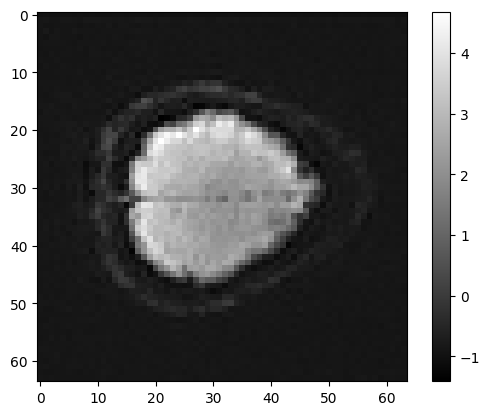

In [ ]:
d = resampled.get_fdata()
plt.imshow(d[:, :, 20, 35], cmap='gray')
plt.colorbar()

In [ ]:
from torch.utils.data import Dataset
import math
import numpy as np
import nibabel.processing
from nilearn import image, masking
import nibabel as nib
import mne
import json
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from skimage.transform import resize
import matplotlib.pyplot as plt
from scipy import ndimage

def fmri_norm(volume, scaler=StandardScaler()):
  # flatten = volume.flatten().reshape((-1, 1))
  # normed = scaler.fit_transform(flatten).reshape(volume.shape)
  mini = np.min(volume, axis=(0, 1), keepdims=True)
  maxi = np.max(volume, axis=(0, 1), keepdims=True)
  normed = (volume - mini) / (maxi - mini)
  assert normed.max() <= 1 and normed.min() >= 0
  return normed

scaler = StandardScaler()

def get_eeg_subjects(dir="/content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338"):
    # eeg files are inside 'derivatives'
    eeg_root = os.path.join(dir, 'derivatives')
    fmri_root = dir
    eeg_subjects = [f for f in os.listdir(eeg_root) if 'sub' in f]
    # print(eeg_subjects)
    _1dNF_paths = []
    _2dNF_paths = []
    _pre_paths = []
    _post_paths = []
    eeg_fmri_table = {}
    for sub in eeg_subjects:
      path = os.path.join(eeg_root, sub, 'eeg_pp')
      experiment_files = [f for f in os.listdir(path) if 'vhdr' in f]
      # print(experiment_files)

      fmri_path = os.path.join(fmri_root, sub, 'func')

      for exp in experiment_files:
        eeg_p = os.path.join(path, exp)
        if '1dNF' in exp:
          _1dNF_paths.append(eeg_p)
          if 'run-01' in exp:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-1dNF_run-01_bold.nii.gz')
          elif 'run-02' in exp:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-1dNF_run-02_bold.nii.gz')
          else:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-1dNF_run-03_bold.nii.gz')
        elif '2dNF' in exp:
          _2dNF_paths.append(eeg_p)
          if 'run-01' in exp:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-2dNF_run-01_bold.nii.gz')
          elif 'run-02' in exp:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-2dNF_run-02_bold.nii.gz')
          else:
            fmri_p = os.path.join(fmri_path, f'{sub}_task-2dNF_run-03_bold.nii.gz')
        else: # control
          if 'post' in exp:
            _post_paths.append(eeg_p)
            fmri_p = os.path.join(fmri_path, f'{sub}_task-MIpost_bold.nii.gz')
          else:
            _pre_paths.append(eeg_p)
            fmri_p = os.path.join(fmri_path, f'{sub}_task-MIpre_bold.nii.gz')

        eeg_fmri_table[eeg_p] = fmri_p

    return _1dNF_paths, _2dNF_paths, _pre_paths, _post_paths, eeg_fmri_table

def resize_volume(img, desired_depth=32, desired_width=64, desired_height=64):
    """Resize across z-axis"""
    # Set the desired depth
    # Get current depth
    current_depth = img.shape[0]
    current_width = img.shape[1]
    current_height = img.shape[2]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    # img = ndimage.rotate(img, 90, reshape=False)

    img = ndimage.zoom(img, (depth_factor, height_factor, width_factor), order=1)
    return img

def eeg_process(eeg):
  len_channels = len(eeg.ch_names)
  x_instance = []
  #eeg
  for channel in range(len_channels):
      print("Before stft, eeg shape: ", eeg.get_data().shape)
      f, Zxx, t = stft(eeg, channel=channel, window_size=200, fs=200, limit=eeg_limit, f_limit=eeg_f_limit)
      print("data_util eeg processing..??")
      print(Zxx.shape)
      x_instance += [Zxx]
  return zscore(np.array(x_instance))

def parse_one_file(eeg_signal, fmri, start_time, end_time, pre_post, window=5, sampling_rate=200, lag=0, ifresize=True):
    result_eeg = []
    result_fmri = []
    # if ifresize:
      # img = np.swapaxes(np.swapaxes(np.swapaxes(fmri.get_fdata(), 0, 3), 1,2), 1,3)
      # dct = DCT3D(*img.shape[1:])
      # downsample_shape = (64, 64, 32)
      # idct = padded_iDCT3D(*(downsample_shape[:2]+(img.shape[3],)+downsample_shape))
      # resampled = image.new_img_like(fmri, np.swapaxes(np.swapaxes(np.swapaxes(idct(dct(img).numpy()[:, :downsample_shape[0], :downsample_shape[1], :]).numpy(), 0, 3), 0,2), 0,1))
      # print("Finished resampling... shape is ", resampled.get_fdata().shape)
      # fmri = resampled.get_fdata()

    fmri = fmri.get_fdata()

    step = window*sampling_rate
    scaler = StandardScaler()
    if pre_post:
      step = sampling_rate*2 # shorter step due to insufficient data

    for t in range(start_time, end_time, step):

        f, Zxx, t = stft(eeg, channel=channel, window_size=200, limit=eeg_limit, f_limit=eeg_f_limit)

        # s = np.array(eeg_signal[:, t:t+sampling_rate]) # take 1 second of eeg data, considering the potential size of model
        # assert s.shape == (64, 200)
        # eeg normalization??
        # mini = np.min(s, axis=1, keepdims=True)
        # maxi = np.max(s, axis=1, keepdims=True)
        # normed = (s - mini) / (maxi - mini)
        print(Zxx.shape)
        result_eeg.append(Zxx)

        # fmri slice normalization + resample
        fmri_slice_start = math.ceil(start_time/sampling_rate)
        sub_volume = np.array(fmri[:, :, :, lag+fmri_slice_start:lag+fmri_slice_start+window]) # 104, 106, 16
        sub_volume = np.mean(sub_volume, axis=-1)
        # print(sub_volume.shape)
        assert sub_volume.shape == (fmri.shape[:3])
        h, w, d = sub_volume.shape
        sub_volume = np.swapaxes(np.swapaxes(sub_volume, 0, 2), 1, 2)

        normed = resize_volume(fmri_norm(sub_volume, scaler))
        assert normed.shape == (32, 64, 64)
        # print(normed.shape)
        result_fmri.append(normed)
    # print("Finished parsing")
    # print(np.array(result_eeg).shape)
    # print(np.array(result_fmri).shape)
    print("Finished parsing one file")
    return result_eeg, result_fmri

def extract_eeg_fmri_pairs_one_file(raw_eeg, raw_fmri, target_code=2, rest_code=99, pre_post=False, ratio = 0.9):
    events, annotations = mne.events_from_annotations(raw_eeg)
    signal = raw_eeg.get_data()
    all_eeg = []
    all_fmri = []
    start = None
    end = None
    find_start = False
    start_end_times = []
    for time, _, event_code in events:
        if event_code == target_code:
            # this is a task trial
            start = time
            find_start = True
        elif event_code == rest_code and find_start:
            # print("Find the end of a stimulus event: ")
            # print(f"Start: {start}; End: {time}")
            start_end_times.append(str([start, time]))
            eeg_fragments, fmri_fragments = parse_one_file(signal, raw_fmri, start, time, pre_post=pre_post)
            all_eeg.extend(eeg_fragments)
            all_fmri.extend(fmri_fragments)
            find_start = False

    p = np.random.permutation(len(all_eeg))
    all_eeg = np.array(all_eeg)[p]
    all_fmri = np.array(all_fmri)[p]
    # eeg_mu = all_eeg.mean()
    # eeg_sig = all_eeg.std()
    mini = np.min(all_eeg)
    maxi = np.max(all_eeg)
    all_eeg = (all_eeg - mini) / (maxi - mini)

    # eeg  z-score normalize
    train_eeg = np.array(all_eeg[:int(all_eeg.shape[0]*ratio)])
    test_eeg = np.array(all_eeg[int(all_eeg.shape[0]*ratio):])
    train_fmri = np.array(all_fmri[:int(all_fmri.shape[0]*ratio)])
    test_fmri = np.array(all_fmri[int(all_fmri.shape[0]*ratio):])
    return train_eeg, train_fmri, test_eeg, test_fmri, start_end_times


def segment_data(dataset_table):
    all_subject_eeg_train = []
    all_subject_eeg_test = []
    all_subject_fmri_train = []
    all_subject_fmri_test = []
    all_subject_label_train = []
    all_subject_label_test = []
    inf = {}
    for eeg_file in dataset_table.keys():
      print(f"=====>>>> Segmenting {eeg_file}")
      eeg = mne.io.read_raw_brainvision(eeg_file)
      events, annotations = mne.events_from_annotations(eeg)
      # print(events[:10])
      try:
        fmri_img = image.load_img(dataset_table[eeg_file])
      except:
        print(f"Failed to load {dataset_table[eeg_file]}... Skipping it")
        continue
      if '1dNF' in eeg_file:
        label = 0
      elif '2dNF' in eeg_file:
        label = 1
      elif 'pre' in eeg_file:
        label = 2
      else:
        label = 3
      eeg_seg_train, fmri_seg_train, eeg_seg_test, fmri_seg_test, times = extract_eeg_fmri_pairs_one_file(eeg, fmri_img) # one subject
      inf[eeg_file] = times
      all_subject_eeg_train.extend(eeg_seg_train)
      all_subject_eeg_test.extend(eeg_seg_test)

      all_subject_fmri_train.extend(fmri_seg_train)
      all_subject_fmri_test.extend(fmri_seg_test)
      all_subject_label_train.extend([label]*len(eeg_seg_train))
      all_subject_label_test.extend([label]*len(eeg_seg_test))

    # permute
    p = np.random.permutation(len(all_subject_eeg_train))
    all_subject_eeg_train = np.stack(all_subject_eeg_train, axis=0)[p]
    all_subject_fmri_train = np.stack(all_subject_fmri_train, axis=0)[p]
    all_subject_label_train = np.array(all_subject_label_train)[p]

    p = np.random.permutation(len(all_subject_eeg_test))
    all_subject_eeg_test = np.stack(all_subject_eeg_test, axis=0)[p]
    all_subject_fmri_test = np.stack(all_subject_fmri_test, axis=0)[p]
    all_subject_label_test = np.array(all_subject_label_test)[p]
    with open('times.json', 'w') as fr:
      json.dump(inf, fr, indent=4)

    return np.expand_dims(all_subject_eeg_train, axis=1), np.expand_dims(all_subject_eeg_test, axis=1), np.expand_dims(all_subject_fmri_train, axis=1), np.expand_dims(all_subject_fmri_test, axis=1), all_subject_label_train, all_subject_label_test



In [ ]:
_1dNF, _2dNF, pre, post, dataset_table = get_eeg_subjects(dir="/content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338")

# train test splitted
train_e, test_e, train_f, test_f, train_l, test_l = segment_data(dataset_table)


=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'T

<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp201/eeg_pp/d_sub-xp201_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp202/eeg_pp/d_sub-xp202_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp203/eeg_pp/d_sub-xp203_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp204/eeg_pp/d_sub-xp204_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp205/eeg_pp/d_sub-xp205_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp206/eeg_pp/d_sub-xp206_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp207/eeg_pp/d_sub-xp207_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Failed to load /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/sub-xp210/func/sub-xp210_task-2dNF_run-03_bold.n

<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)
<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp210/eeg_pp/d_sub-xp210_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp211/eeg_pp/d_sub-xp211_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp213/eeg_pp/d_sub-xp213_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp216/eeg_pp/d_sub-xp216_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp217/eeg_pp/d_sub-xp217_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp218/eeg_pp/d_sub-xp218_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Failed to load /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/sub-xp219/func/sub-xp219_task-1

<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)
<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp219/eeg_pp/d_sub-xp219_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_NF4_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_NF4_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp220/eeg_pp/d_sub-xp220_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-2dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp221/eeg_pp/d_sub-xp221_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 35', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 35', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-01_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-01_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-02_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-02_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-03_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-1dNF_run-03_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-MIpost_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-MIpost_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
=====>>>> Segmenting /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-MIpre_eeg_pp.vhdr
Extracting parameters from /content/drive/MyDrive/EEG_GAN/datasets/datasets/ds002338/derivatives/sub-xp222/eeg_pp/d_sub-xp222_task-MIpre_eeg_pp.vhdr...
Setting channel info structure...
Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']


<ipython-input-4-a8fedfa92e59>:194: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  eeg = mne.io.read_raw_brainvision(eeg_file)


Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  2', 'Stimulus/S 99', 'Stimulus/S101', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART', 'Time 0/']
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file
Finished parsing one file


In [ ]:

print(train_e.shape, train_f.shape, test_e.shape, test_f.shape)
print(train_e.min(), train_e.max())
print(train_f.min(), train_f.max())

(2084, 1, 64, 200) (2084, 1, 32, 64, 64) (251, 1, 64, 200) (251, 1, 32, 64, 64)
0.0 1.0
-1.0 1.0


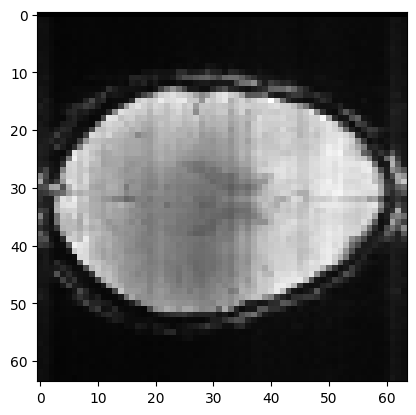

In [ ]:
example_f = train_f[100][0][2]
plt.imshow(example_f, cmap='gray')

In [ ]:
from matplotlib import pyplot as plt
import matplotlib as mpl
num = 2250
plt.title('label:'+str(train_l[num]))
plt.imshow(train_f[num][:,:,10], cmap='gray')

NameError: ignored

In [ ]:
import torch
import numpy as np
test_ee = np.stack(test_e, axis=0)
test_ee.shape

(328, 64, 200)

# Classifier

In [ ]:
"""
EEG Conformer

Convolutional Transformer for EEG decoding

Couple CNN and Transformer in a concise manner with amazing results
"""
# remember to change paths

import argparse
import os
# gpus = [0]
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ["CUDA_VISIBLE_DEVICES"] = ','.join(map(str, gpus))
import numpy as np
import math
import glob
import random
import itertools
import datetime
import time
import datetime
import sys
import scipy.io

import torchvision.transforms as transforms
from torchvision.utils import save_image, make_grid

from torch.utils.data import DataLoader
from torch.autograd import Variable
# from torchsummary import summary
import torch.autograd as autograd
from torchvision.models import vgg19

import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn.init as init

from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
from sklearn.decomposition import PCA

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from torchvision.transforms import Compose, Resize, ToTensor
!pip install einops
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
# from common_spatial_pattern import csp

import matplotlib.pyplot as plt
# from torch.utils.tensorboard import SummaryWriter
from torch.backends import cudnn
# cudnn.benchmark = False
# cudnn.deterministic = True

# writer = SummaryWriter('./TensorBoardX/')


# Convolution module
# use conv to capture local features, instead of postion embedding.
class PatchEmbedding(nn.Module):
    def __init__(self, emb_size=40):
        # self.patch_size = patch_size
        super().__init__()

        self.shallownet = nn.Sequential(
            nn.Conv2d(1, 40, (1, 25), (1, 1)),
            nn.Conv2d(40, 40, (22, 1), (1, 1)),
            nn.BatchNorm2d(40),
            nn.ELU(),
            nn.AvgPool2d((1, 75), (1, 15)),  # pooling acts as slicing to obtain 'patch' along the time dimension as in ViT
            nn.Dropout(0.5),
        )

        self.projection = nn.Sequential(
            nn.Conv2d(40, emb_size, (1, 1), stride=(1, 1)),  # transpose, conv could enhance fiting ability slightly
            Rearrange('b e (h) (w) -> b (h w) e'),
        )


    def forward(self, x: Tensor) -> Tensor:
        b, _, _, _ = x.shape
        x = self.shallownet(x)
        x = self.projection(x)
        return x


class MultiHeadAttention(nn.Module):
    def __init__(self, emb_size, num_heads, dropout):
        super().__init__()
        self.emb_size = emb_size
        self.num_heads = num_heads
        self.keys = nn.Linear(emb_size, emb_size)
        self.queries = nn.Linear(emb_size, emb_size)
        self.values = nn.Linear(emb_size, emb_size)
        self.att_drop = nn.Dropout(dropout)
        self.projection = nn.Linear(emb_size, emb_size)

    def forward(self, x: Tensor, mask: Tensor = None) -> Tensor:
        queries = rearrange(self.queries(x), "b n (h d) -> b h n d", h=self.num_heads)
        keys = rearrange(self.keys(x), "b n (h d) -> b h n d", h=self.num_heads)
        values = rearrange(self.values(x), "b n (h d) -> b h n d", h=self.num_heads)
        energy = torch.einsum('bhqd, bhkd -> bhqk', queries, keys)
        if mask is not None:
            fill_value = torch.finfo(torch.float32).min
            energy.mask_fill(~mask, fill_value)

        scaling = self.emb_size ** (1 / 2)
        att = F.softmax(energy / scaling, dim=-1)
        att = self.att_drop(att)
        out = torch.einsum('bhal, bhlv -> bhav ', att, values)
        out = rearrange(out, "b h n d -> b n (h d)")
        out = self.projection(out)
        return out


class ResidualAdd(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, **kwargs):
        res = x
        x = self.fn(x, **kwargs)
        x += res
        return x


class FeedForwardBlock(nn.Sequential):
    def __init__(self, emb_size, expansion, drop_p):
        super().__init__(
            nn.Linear(emb_size, expansion * emb_size),
            nn.GELU(),
            nn.Dropout(drop_p),
            nn.Linear(expansion * emb_size, emb_size),
        )


class GELU(nn.Module):
    def forward(self, input: Tensor) -> Tensor:
        return input*0.5*(1.0+torch.erf(input/math.sqrt(2.0)))


class TransformerEncoderBlock(nn.Sequential):
    def __init__(self,
                 emb_size,
                 num_heads=10,
                 drop_p=0.5,
                 forward_expansion=4,
                 forward_drop_p=0.5):
        super().__init__(
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                MultiHeadAttention(emb_size, num_heads, drop_p),
                nn.Dropout(drop_p)
            )),
            ResidualAdd(nn.Sequential(
                nn.LayerNorm(emb_size),
                FeedForwardBlock(
                    emb_size, expansion=forward_expansion, drop_p=forward_drop_p),
                nn.Dropout(drop_p)
            )
            ))


class TransformerEncoder(nn.Sequential):
    def __init__(self, depth, emb_size):
        super().__init__(*[TransformerEncoderBlock(emb_size) for _ in range(depth)])


class ClassificationHead(nn.Sequential):
    def __init__(self, emb_size, n_classes, cond_size=128):
        super().__init__()

        # global average pooling
        self.clshead = nn.Sequential(
            Reduce('b n e -> b e', reduction='mean'),
            nn.LayerNorm(emb_size),
            nn.Linear(emb_size, n_classes)
        )
        self.fc = nn.Sequential(
            nn.Linear(12040, 256),
            nn.ELU(),
            nn.Dropout(0.5),
            nn.Linear(256, cond_size),
            nn.ELU(),
            nn.Dropout(0.5),
            nn.Linear(cond_size, 4)
        )

    def forward(self, x):
        # print(x.shape)
        x = x.contiguous().view(x.size(0), -1)
        # print(x.shape)
        out = self.fc(x)
        return x, out


class Conformer(nn.Sequential):
    def __init__(self, emb_size=40, depth=6, n_classes=4, cond_size=128, **kwargs):
        super().__init__(

            PatchEmbedding(emb_size),
            TransformerEncoder(depth, emb_size),
            ClassificationHead(emb_size, n_classes, cond_size)
        )


In [ ]:
train_eeg = torch.from_numpy(train_e)
train_fmri = torch.from_numpy(train_f)
train_l = torch.from_numpy(train_l)

test_eeg = torch.from_numpy(test_e)
test_fmri = torch.from_numpy(test_f)
test_l = torch.from_numpy(test_l)


In [ ]:
batch_size = 16
n_epochs = 2000
c_dim = 4
lr = 0.0001
b1 = 0.5
b2 = 0.999
train_eeg = torch.permute(train_eeg, (0, 1, 3, 2))
test_eeg = torch.permute(test_eeg, (0, 1, 3, 2))
print(train_eeg.shape)
dataset = torch.utils.data.TensorDataset(train_eeg, train_l)
train_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataset = torch.utils.data.TensorDataset(test_eeg, test_l)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

start_epoch = 0
# root = '/Data/strict_TE/'

# log_write = open("./results/log_subject%d.txt" % self.nSub, "w")


Tensor = torch.cuda.FloatTensor
LongTensor = torch.cuda.LongTensor
# Tensor = torch.FloatTensor
# LongTensor = torch.LongTensor
criterion_l1 = torch.nn.L1Loss().cuda()
criterion_l2 = torch.nn.MSELoss().cuda()
criterion_cls = torch.nn.CrossEntropyLoss().cuda()

model = EEGNet().cuda()
inps = torch.zeros((32, 1, 200, 64)).cuda()
out = model(inps)
out.shape
# criterion_l1 = torch.nn.L1Loss()
# criterion_l2 = torch.nn.MSELoss()
# criterion_cls = torch.nn.CrossEntropyLoss()

# model = Conformer()
# self.model = nn.DataParallel(self.model, device_ids=[i for i in range(len(gpus))])
# model = self.model.cuda()

# train_e, test_e, train_f, test_f, train_l, test_l = segment_data(dataset_table)
# train_e_ = np.expand_dims(np.stack(train_e, axis=0), axis=1)
# train_l_ = np.stack(train_l, axis=0)
# test_e_ = np.expand_dims(np.stack(test_e, axis=0), axis=1)
# test_l_ = np.stack(test_l, axis=0)
# print(train_e_.shape)
# print(train_l_.shape)
# print(test_e_.shape)
# print(test_l_.shape)

torch.Size([2084, 1, 200, 64])
torch.Size([32, 4, 2, 12])
torch.Size([32, 96])


torch.Size([32, 1])

In [ ]:



# Optimizers
optimizer = torch.optim.Adam(model.parameters(), lr=lr ) #betas=(b1, b2)

# test_data = Variable(test_data.cuda().type(Tensor))
# test_label = Variable(test_label.cuda().type(LongTensor))

device=torch.device('cuda')

bestAcc = 0
averAcc = 0
num = 0
Y_true = 0
Y_pred = 0

# Train the cnn model

curr_lr = lr

for e in range(n_epochs):
    # in_epoch = time.time()
    # print(f"In epoch {e}")
    model.train()
    for i, (img, label) in enumerate(train_dataloader):

        # img = Variable(img.cuda().type(Tensor))
        # label = Variable(label.cuda().type(LongTensor))
        img = Variable(img.type(Tensor)).to(device)
        label = Variable(label.type(LongTensor)).to(device)
        outputs = model(img)

        loss = criterion_cls(outputs, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # test process
    if (e + 1) % 10 == 0:
        model.eval()
        test_acc = 0
        count = 0
        for i, (img, test_label) in enumerate(test_dataloader):
          # img = Variable(img.cuda().type(Tensor))
          # label = Variable(label.cuda().type(LongTensor))
          img = Variable(img.type(Tensor)).to(device)
          test_label = Variable(label.type(LongTensor)).to(device)
          Cls = model(img)

          loss_test = criterion_cls(Cls, test_label)
          y_pred = torch.max(Cls, 1)[1]
          acc = float((y_pred == test_label).cpu().numpy().astype(int).sum()) / float(test_label.size(0))
          test_acc += acc
          count += 1

        test_acc = test_acc / count
        train_pred = torch.max(outputs, 1)[1]
        train_acc = float((train_pred == label).cpu().numpy().astype(int).sum()) / float(label.size(0))

        print('Epoch:', e,
              '  Train loss: %.6f' % loss.detach().cpu().numpy(), #loss.detach().cpu().numpy()
              '  Test loss: %.6f' % loss_test.detach().cpu().numpy(),
              '  Train accuracy %.6f' % train_acc,
              '  Test accuracy is %.6f' % test_acc)

        # self.log_write.write(str(e) + "    " + str(acc) + "\n")
        num = num + 1
        averAcc = averAcc + acc
        if acc > bestAcc:
            bestAcc = acc
            Y_true = test_label
            Y_pred = y_pred


# torch.save(self.model.module.state_dict(), 'model.pth')
averAcc = averAcc / num
print('The average accuracy is:', averAcc)
print('The best accuracy is:', bestAcc)

# return bestAcc, averAcc, Y_true, Y_pred

In [ ]:
class EEGNet(nn.Module):
    def __init__(self):
        super(EEGNet, self).__init__()
        self.T = 120

        # Layer 1
        self.conv1 = nn.Conv2d(1, 16, (1, 64), padding = 0)
        self.batchnorm1 = nn.BatchNorm2d(16, False)

        # Layer 2
        self.padding1 = nn.ZeroPad2d((16, 17, 0, 1))
        self.conv2 = nn.Conv2d(1, 4, (2, 32))
        self.batchnorm2 = nn.BatchNorm2d(4, False)
        self.pooling2 = nn.MaxPool2d(2, 4)

        # Layer 3
        self.padding2 = nn.ZeroPad2d((2, 1, 4, 3))
        self.conv3 = nn.Conv2d(4, 4, (8, 4))
        self.batchnorm3 = nn.BatchNorm2d(4, False)
        self.pooling3 = nn.MaxPool2d((2, 4))

        # FC Layer
        # NOTE: This dimension will depend on the number of timestamps per sample in your data.
        # I have 120 timepoints.
        self.fc1 = nn.Linear(96, 1)


    def forward(self, x):
        # Layer 1
        x = F.elu(self.conv1(x))
        x = self.batchnorm1(x)
        x = F.dropout(x, 0.25)
        x = x.permute(0, 3, 1, 2)

        # Layer 2
        x = self.padding1(x)
        x = F.elu(self.conv2(x))
        x = self.batchnorm2(x)
        x = F.dropout(x, 0.25)
        x = self.pooling2(x)

        # Layer 3
        x = self.padding2(x)
        x = F.elu(self.conv3(x))
        x = self.batchnorm3(x)
        x = F.dropout(x, 0.25)
        x = self.pooling3(x)

        # FC Layer
        print(x.shape)
        x = x.reshape((x.shape[0], -1))
        print(x.shape)
        x = F.sigmoid(self.fc1(x))
        return x

In [ ]:
"""
 ARL_EEGModels - A collection of Convolutional Neural Network models for EEG
 Signal Processing and Classification, using Keras and Tensorflow

 Requirements:
    (1) tensorflow == 2.X (as of this writing, 2.0 - 2.3 have been verified
        as working)

 To run the EEG/MEG ERP classification sample script, you will also need

    (4) mne >= 0.17.1
    (5) PyRiemann >= 0.2.5
    (6) scikit-learn >= 0.20.1
    (7) matplotlib >= 2.2.3

 To use:

    (1) Place this file in the PYTHONPATH variable in your IDE (i.e.: Spyder)
    (2) Import the model as

        from EEGModels import EEGNet

        model = EEGNet(nb_classes = ..., Chans = ..., Samples = ...)

    (3) Then compile and fit the model

        model.compile(loss = ..., optimizer = ..., metrics = ...)
        fitted    = model.fit(...)
        predicted = model.predict(...)

 Portions of this project are works of the United States Government and are not
 subject to domestic copyright protection under 17 USC Sec. 105.  Those
 portions are released world-wide under the terms of the Creative Commons Zero
 1.0 (CC0) license.

 Other portions of this project are subject to domestic copyright protection
 under 17 USC Sec. 105.  Those portions are licensed under the Apache 2.0
 license.  The complete text of the license governing this material is in
 the file labeled LICENSE.TXT that is a part of this project's official
 distribution.
"""

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K


def EEGNet(nb_classes, Chans = 64, Samples = 128,
             dropoutRate = 0.5, kernLength = 64, F1 = 8,
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta

    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:

        1. Depthwise Convolutions to learn spatial filters within a
        temporal convolution. The use of the depth_multiplier option maps
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn
        spatial filters within each filter in a filter-bank. This also limits
        the number of free parameters to fit when compared to a fully-connected
        convolution.

        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions.


    While the original paper used Dropout, we found that SpatialDropout2D
    sometimes produced slightly better results for classification of ERP
    signals. However, SpatialDropout2D significantly reduced performance
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.

    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the
    kernel lengths for double the sampling rate, etc). Note that we haven't
    tested the model performance with this rule so this may not work well.

    The model with default parameters gives the EEGNet-8,2 model as discussed
    in the paper. This model should do pretty well in general, although it is
	advised to do some model searching to get optimal performance on your
	particular dataset.

    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D.

    Inputs:

      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 8, F2 = F1 * D.
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.

    """

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)

    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)

    flatten      = Flatten(name = 'flatten')(block2)

    dense        = Dense(nb_classes, name = 'dense',
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)

    return Model(inputs=input1, outputs=softmax)




def EEGNet_SSVEP(nb_classes = 12, Chans = 8, Samples = 256,
             dropoutRate = 0.5, kernLength = 256, F1 = 96,
             D = 1, F2 = 96, dropoutType = 'Dropout'):
    """ SSVEP Variant of EEGNet, as used in [1].

    Inputs:

      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn.
      D               : number of spatial filters to learn within each temporal
                        convolution.
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.


    [1]. Waytowich, N. et. al. (2018). Compact Convolutional Neural Networks
    for Classification of Asynchronous Steady-State Visual Evoked Potentials.
    Journal of Neural Engineering vol. 15(6).
    http://iopscience.iop.org/article/10.1088/1741-2552/aae5d8

    """

    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')

    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False,
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 4))(block1)
    block1       = dropoutType(dropoutRate)(block1)

    block2       = SeparableConv2D(F2, (1, 16),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 8))(block2)
    block2       = dropoutType(dropoutRate)(block2)

    flatten      = Flatten(name = 'flatten')(block2)

    dense        = Dense(nb_classes, name = 'dense')(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)

    return Model(inputs=input1, outputs=softmax)



def EEGNet_old(nb_classes, Chans = 64, Samples = 128, regRate = 0.0001,
           dropoutRate = 0.25, kernels = [(2, 32), (8, 4)], strides = (2, 4)):
    """ Keras Implementation of EEGNet_v1 (https://arxiv.org/abs/1611.08024v2)

    This model is the original EEGNet model proposed on arxiv
            https://arxiv.org/abs/1611.08024v2

    with a few modifications: we use striding instead of max-pooling as this
    helped slightly in classification performance while also providing a
    computational speed-up.

    Note that we no longer recommend the use of this architecture, as the new
    version of EEGNet performs much better overall and has nicer properties.

    Inputs:

        nb_classes     : total number of final categories
        Chans, Samples : number of EEG channels and samples, respectively
        regRate        : regularization rate for L1 and L2 regularizations
        dropoutRate    : dropout fraction
        kernels        : the 2nd and 3rd layer kernel dimensions (default is
                         the [2, 32] x [8, 4] configuration)
        strides        : the stride size (note that this replaces the max-pool
                         used in the original paper)

    """

    # start the model
    input_main   = Input((Chans, Samples))
    layer1       = Conv2D(16, (Chans, 1), input_shape=(Chans, Samples, 1),
                                 kernel_regularizer = l1_l2(l1=regRate, l2=regRate))(input_main)
    layer1       = BatchNormalization()(layer1)
    layer1       = Activation('elu')(layer1)
    layer1       = Dropout(dropoutRate)(layer1)

    permute_dims = 2, 1, 3
    permute1     = Permute(permute_dims)(layer1)

    layer2       = Conv2D(4, kernels[0], padding = 'same',
                            kernel_regularizer=l1_l2(l1=0.0, l2=regRate),
                            strides = strides)(permute1)
    layer2       = BatchNormalization()(layer2)
    layer2       = Activation('elu')(layer2)
    layer2       = Dropout(dropoutRate)(layer2)

    layer3       = Conv2D(4, kernels[1], padding = 'same',
                            kernel_regularizer=l1_l2(l1=0.0, l2=regRate),
                            strides = strides)(layer2)
    layer3       = BatchNormalization()(layer3)
    layer3       = Activation('elu')(layer3)
    layer3       = Dropout(dropoutRate)(layer3)

    flatten      = Flatten(name = 'flatten')(layer3)

    dense        = Dense(nb_classes, name = 'dense')(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)

    return Model(inputs=input_main, outputs=softmax)



def DeepConvNet(nb_classes, Chans = 64, Samples = 256,
                dropoutRate = 0.5):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.

    This implementation assumes the input is a 2-second EEG signal sampled at
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference.

    Note that we use the max_norm constraint on all convolutional layers, as
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication
    with the original authors.

                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10

    Note that this implementation has not been verified by the original
    authors.

    """

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(25, (1, 5),
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation('elu')(block1)
    block1       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block1)
    block1       = Dropout(dropoutRate)(block1)

    block2       = Conv2D(50, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block2)
    block2       = Activation('elu')(block2)
    block2       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block2)
    block2       = Dropout(dropoutRate)(block2)

    block3       = Conv2D(100, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block3)
    block3       = Activation('elu')(block3)
    block3       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block3)
    block3       = Dropout(dropoutRate)(block3)

    block4       = Conv2D(200, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block4)
    block4       = Activation('elu')(block4)
    block4       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block4)
    block4       = Dropout(dropoutRate)(block4)

    flatten      = Flatten()(block4)

    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)

    return Model(inputs=input_main, outputs=softmax)


# need these for ShallowConvNet
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-7, max_value = 10000))


def ShallowConvNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.5):
    """ Keras implementation of the Shallow Convolutional Network as described
    in Schirrmeister et. al. (2017), Human Brain Mapping.

    Assumes the input is a 2-second EEG signal sampled at 128Hz. Note that in
    the original paper, they do temporal convolutions of length 25 for EEG
    data sampled at 250Hz. We instead use length 13 since the sampling rate is
    roughly half of the 250Hz which the paper used. The pool_size and stride
    in later layers is also approximately half of what is used in the paper.

    Note that we use the max_norm constraint on all convolutional layers, as
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication
    with the original authors.

                     ours        original paper
    pool_size        1, 35       1, 75
    strides          1, 7        1, 15
    conv filters     1, 13       1, 25

    Note that this implementation has not been verified by the original
    authors. We do note that this implementation reproduces the results in the
    original paper with minor deviations.
    """

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(40, (1, 13),
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(40, (Chans, 1), use_bias=False,
                          kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation(square)(block1)
    block1       = AveragePooling2D(pool_size=(1, 35), strides=(1, 7))(block1)
    block1       = Activation(log)(block1)
    block1       = Dropout(dropoutRate)(block1)
    flatten      = Flatten()(block1)
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)

    return Model(inputs=input_main, outputs=softmax)

In [ ]:
model  = EEGNet(nb_classes=4, Chans=64, Samples=200)
AUTOTUNE = tf.data.experimental.AUTOTUNE
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
ds = tf.dattrain_dataset = tf.data.Dataset.from_tensor_slices((train_e, train_y))
train_dataset = train_dataset.shuffle(buffer_size=1000, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size).prefetch(AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_e, test_y))
test_dataset = test_dataset.batch(batch_size).prefetch(AUTOTUNE)
fittedModel = model.fit(...)
predicted = model.predict(...)

# Con-VAE With ELBO & NIWAE

In [ ]:

import torch
from torch import nn
from torch.nn import functional as F


def log_mean_exp(x, dim):
    """
    Compute the log(mean(exp(x), dim)) in a numerically stable manner

    Args:
        x: tensor: (...): Arbitrary tensor
        dim: int: (): Dimension along which mean is computed

    Return:
        _: tensor: (...): log(mean(exp(x), dim))
    """
    return log_sum_exp(x, dim) - np.log(x.size(dim))


def log_sum_exp(x, dim=0):
    """
    Compute the log(sum(exp(x), dim)) in a numerically stable manner

    Args:
        x: tensor: (...): Arbitrary tensor
        dim: int: (): Dimension along which sum is computed

    Return:
        _: tensor: (...): log(sum(exp(x), dim))
    """
    max_x = torch.max(x, dim)[0]
    new_x = x - max_x.unsqueeze(dim).expand_as(x)
    return max_x + (new_x.exp().sum(dim)).log()

def log_normal(x, m, v):
    """
    Computes the elem-wise log probability of a Gaussian and then sum over the
    last dim. Basically we're assuming all dims are batch dims except for the
    last dim.

    Args:
        x: tensor: (batch_1, batch_2, ..., batch_k, dim): Observation
        m: tensor: (batch_1, batch_2, ..., batch_k, dim): Mean
        v: tensor: (batch_1, batch_2, ..., batch_k, dim): Variance

    Return:
        log_prob: tensor: (batch_1, batch_2, ..., batch_k): log probability of
            each sample. Note that the summation dimension is not kept
    """
    ################################################################################
    # TODO: Modify/complete the code here
    # Compute element-wise log probability of normal and remember to sum over
    # the last dimension
    ################################################################################
    # assert x.shape == m.shape
    log_prob = -0.5 * torch.sum(torch.log(torch.Tensor([2.0]).cuda() * torch.pi) + torch.log(v) + torch.pow(x - m, 2) / v, dim=-1)

    ################################################################################
    # End of code modification
    ################################################################################
    return log_prob



def log_normal_mixture(z, m, v):
    """
    Computes log probability of Gaussian mixture.

    Args:
        z: tensor: (batch, dim): Observations
        m: tensor: (batch, mix, dim): Mixture means
        v: tensor: (batch, mix, dim): Mixture variances

    Return:
        log_prob: tensor: (batch,): log probability of each sample
    """
    ################################################################################
    # TODO: Modify/complete the code here
    # Compute the uniformly-weighted mixture of Gaussians density for each sample
    # in the batch
    ################################################################################
    b, k, d = m.shape
    # print(m.shape)
    # print(z.shape)
    # print(m.shape)
    z = torch.unsqueeze(z, dim=1)
    # assert z.shape == m.shape
    log_prob = log_normal(z, m, v)
    log_prob = log_mean_exp(log_prob, dim=1)
    # log_prob = torch.log(1/k * torch.sum(s, dim=-1))
    ################################################################################
    # End of code modification
    ################################################################################
    # print(log_prob.shape)
    # assert log_prob.shape == (m.shape[0],)
    return log_prob


def gaussian_parameters(h, dim=-1):
    """
    Converts generic real-valued representations into mean and variance
    parameters of a Gaussian distribution

    Args:
        h: tensor: (batch, ..., dim, ...): Arbitrary tensor
        dim: int: (): Dimension along which to split the tensor for mean and
            variance

    Returns:
        m: tensor: (batch, ..., dim / 2, ...): Mean
        v: tensor: (batch, ..., dim / 2, ...): Variance
    """
    m, h = torch.split(h, h.size(dim) // 2, dim=dim)
    v = F.softplus(h) + 1e-8
    return m, v

bce = torch.nn.BCEWithLogitsLoss(reduction='none')

def log_bernoulli_with_logits(x, logits):
    """
    Computes the log probability of a Bernoulli given its logits

    Args:
        x: tensor: (batch, dim): Observation
        logits: tensor: (batch, dim): Bernoulli logits

    Return:
        log_prob: tensor: (batch,): log probability of each sample
    """
    log_prob = -bce(input=logits, target=x).mean((1, 2, 3, 4))
    return log_prob

def sample_gaussian(m, v):
    """
    Element-wise application reparameterization trick to sample from Gaussian

    Args:
        m: tensor: (batch, ...): Mean
        v: tensor: (batch, ...): Variance

    Return:
        z: tensor: (batch, dim): Samples
    """
    ################################################################################
    # TODO: Modify/complete the code here
    # Sample z
    ################################################################################
    eps = torch.randn_like(v).cuda()
    z = m + torch.sqrt(v) * eps
    ################################################################################
    # End of code modification
    ################################################################################
    return z

def duplicate(x, rep):
    """
    Duplicates x along dim=0

    Args:
        x: tensor: (batch, ...): Arbitrary tensor
        rep: int: (): Number of replicates. Setting rep=1 returns orignal x

    Returns:
        _: tensor: (batch * rep, ...): Arbitrary replicated tensor
    """
    return x.expand(rep, *x.shape).reshape(-1, *x.shape[1:])

class CVAE3D(nn.Module):
    def __init__(self, feature_size=256, latent_size=128, conditional_size=4, hidden_size=400, k=10, z_dim=2, iw=10):
        super(CVAE3D, self).__init__()
         # Mixture of Gaussians prior
        self.k = k
        self.z_dim = z_dim
        self.iw = iw

        self.z_pre = torch.nn.Parameter(torch.randn(1, 2 * self.k, self.z_dim)
                                        / np.sqrt(self.k * self.z_dim))
        # Uniform weighting
        self.pi = torch.nn.Parameter(torch.ones(k) / k, requires_grad=False)

        self.feature_size = feature_size
        self.conditional_size = conditional_size

        # self.eeg_model = Conformer(cond_size=conditional_size)

        # encode
        # input size: batch, 1, 16, 64, 64
        self.conv1  = nn.Conv3d(1, 16, kernel_size=3, stride=(2, 2, 2), padding=1) # , 16, 32, 32
        self.enc_bn1 = nn.BatchNorm3d(16)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=3, stride=(2, 2, 2), padding=1) # 8, 16, 16
        self.enc_bn2 = nn.BatchNorm3d(32)
        self.conv3 = nn.Conv3d(32, 16, kernel_size=3, stride=(2, 2, 2), padding=1) #4, 8, 8
        self.enc_bn3 = nn.BatchNorm3d(16)
        self.conv4 = nn.Conv3d(16, 1, kernel_size=3, stride=1, padding=1) # 4, 8, 8
        self.flat = nn.Flatten()
        # ---- End of encoder feature extraction -----

        # fc to z-dim
        self.fc11 = nn.Linear(256 + conditional_size, 2 * self.z_dim)
        # self.fc12 = nn.Linear(64 + conditional_size, self.z_dim)

        # decoder, conv3d + upsample
        # latent to a linear [4, 4, 4]
        self.d_fc = nn.Linear(self.z_dim + conditional_size, 2*4*4*8)
        # self.transpose_3d = nn.ConvTranspose3d(8, 32, kernel_size=3, stride=2, padding=1, bias=True)
        self.tp_conv1 = nn.Conv3d(8, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.dec_bn1 = nn.BatchNorm3d(32)
        self.tp_conv2 = nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1, bias=True)
        self.dec_bn2 = nn.BatchNorm3d(64)
        self.tp_conv3 = nn.Conv3d(64, 32, kernel_size=3, stride=1, padding=1, bias=True)
        self.dec_bn3 = nn.BatchNorm3d(32)
        self.tp_conv4 = nn.Conv3d(32, 1, kernel_size=3, stride=1, padding=1, bias=True)

        self.sigmoid = nn.Sigmoid()
        # self.tanh = F.tanh()

    def encode(self, x, condition): # Q(z|x, c) condition:(batch, conditional_size); x: (batch, 104, 106, 16)
        '''
        x dimension: (batch_size, channel, depth, height, width)
        c dimension: (batch_size, feature_size)
        '''
        # inputs = torch.cat([x, condition], 1) # (bs, feature_size+class_size)
        # h1 = self.elu(self.fc1(inputs))
        # _, condition = self.eeg_model(eeg_input)
        x1 = F.leaky_relu(self.enc_bn1(self.conv1(x)))
        # print(x1.shape)
        x2 = F.leaky_relu(self.enc_bn2(self.conv2(x1)))
        # print(x2.shape)
        x3 = F.leaky_relu(self.enc_bn3(self.conv3(x2)))
        x4 = self.conv4(x3)
        flat = self.flat(x4)
        # print(flat.shape)
        # print(flat.shape)
        conditioned = torch.concat([flat, condition], dim=-1)
        # print(conditioned.shape)

        z_m_v = self.fc11(conditioned)
        # z_var = self.fc12(conditioned)
        z_mu, z_var = gaussian_parameters(z_m_v, dim=-1)
        # print(" checking z_mu and z_var")
        # print(z_mu, z_var)
        return z_mu, z_var

    # def gaussian_sample(self, mu, logvar):
    #     std = torch.exp(0.5*logvar)
    #     eps = torch.randn_like(std)
    #     return mu + eps*std

    def negative_elbo_bound(self, fmri, label):
        """
        Computes the Evidence Lower Bound, KL and, Reconstruction costs

        Args:
            x: tensor: (batch, dim): Observations

        Returns:
            nelbo: tensor: (): Negative evidence lower bound
            kl: tensor: (): ELBO KL divergence to prior
            rec: tensor: (): ELBO Reconstruction term
        """
        ################################################################################
        # TODO: Modify/complete the code here
        # Compute negative Evidence Lower Bound and its KL and Rec decomposition
        #
        # To help you start, we have computed the mixture of Gaussians prior
        # prior = (m_mixture, v_mixture) for you, where
        # m_mixture and v_mixture each have shape (1, self.k, self.z_dim)
        #
        # Note that nelbo = kl + rec
        #
        # Outputs should all be scalar
        ################################################################################
        # We provide the learnable prior for you. Familiarize yourself with
        # this object by checking its shape.
        batch = fmri.shape[0]
        prior = gaussian_parameters(self.z_pre, dim=1)
        m, v = self.encode(fmri, label) # mu & v
        # print(" checking m and v:")
        # print(m, v)
        assert not torch.isnan(m).any()
        assert not torch.isnan(v).any()
        # print("m shape: ", m.shape)
        # print("v shape: ", v.shape)

        z = sample_gaussian(m, v) # q(z|x)
        # print(" checking z: ")
        # print(z)

        a = log_normal(z, m, v)
        # print(a)

        b = log_normal_mixture(z, *prior)
        # print(b)

        kl = a - b
        assert kl.shape[0] == fmri.shape[0]
        # x_reconstructed = self.sample_x_given(z) # p(x | z) z~q(z|x)
        logits = self.decode(z, label)
        rec = log_bernoulli_with_logits(fmri, logits) * (-1)
        # print("rec loss shape: ", rec.shape)
        nelbo = kl + rec
        kl = kl.mean()
        rec = rec.mean()
        nelbo = nelbo.mean()
        # print(nelbo, kl, rec)

        ################################################################################
        # End of code modification
        ################################################################################
        return nelbo, kl, rec


    def negative_iwae_bound(self, x, label):
        """
        Computes the Importance Weighted Autoencoder Bound
        Additionally, we also compute the ELBO KL and reconstruction terms

        Args:
            x: tensor: (batch, dim): Observations
            iw: int: (): Number of importance weighted samples

        Returns:
            niwae: tensor: (): Negative IWAE bound
            kl: tensor: (): ELBO KL divergence to prior
            rec: tensor: (): ELBO Reconstruction term
        """
        ################################################################################
        # TODO: Modify/complete the code here
        # Compute niwae (negative IWAE) with iw importance samples, and the KL
        # and Rec decomposition of the Evidence Lower Bound
        #
        # Outputs should all be scalar
        ################################################################################
        # We provide the learnable prior for you. Familiarize yourself with
        # this object by checking its shape.
        iw = self.iw
        prior = gaussian_parameters(self.z_pre, dim=1)
        m, v = self.encode(x, label)
        m = duplicate(m, iw)
        v = duplicate(v, iw)
        x = duplicate(x, iw)
        label = duplicate(label, iw)
        z = sample_gaussian(m, v)
        logits = self.decode(z, label)
        kl = log_normal(z, m, v) - log_normal_mixture(z, *prior)
        rec = -log_bernoulli_with_logits(x, logits)
        nelbo = kl + rec
        niwae = -log_mean_exp(-nelbo.reshape(iw, -1), dim=0)
        niwae = niwae.mean()
        kl = kl.mean()
        rec = rec.mean()
        ################################################################################
        # End of code modification
        ################################################################################
        return niwae, kl, rec

    def loss(self, fmri, label):
        nelbo, kl, rec = self.negative_nelbo_bound(fmri, label)
        loss = nelbo

        summaries = dict((
            ('train/loss', nelbo),
            ('gen/elbo', -nelbo),
            ('gen/kl_z', kl),
            ('gen/rec', rec),
        ))

        return loss, summaries

    def decode(self, z, c): # P(x|z, c)
        '''
        z: (bs, latent_size)
        c: (bs, class_size)
        '''
        # print("In decode")
        # print(z.shape, c.shape)
        conditioned_noise = torch.cat([z, c], 1) # (bs, latent_size+conditional_size)
        res = self.d_fc(conditioned_noise)
        res = torch.reshape(res, (-1, 8, 2, 4, 4))
        res = nn.ReLU()(self.dec_bn1(self.tp_conv1(res))) # batch, 32, 4, 4, 4
        # print(res.shape)
        res = F.interpolate(res, scale_factor=2) # batch, 32, 8, 8, 8
        # print(res.shape)
        assert res.shape[1:] == (32, 4, 8, 8)

        res = nn.ReLU()(self.dec_bn2(self.tp_conv2(res))) # batch, 64, 8, 8, 8
        res = F.interpolate(res, scale_factor=2) # batch, 64, 16, 16, 16
        assert res.shape[1:] == (64, 8, 16, 16)

        res = nn.ReLU()(self.dec_bn3(self.tp_conv3(res))) # batch, 32, 16, 16, 16
        res = F.interpolate(res, scale_factor=2) # batch, 32, 16, 32, 32
        assert res.shape[1:] == (32, 16, 32, 32)

        res = nn.ReLU()(self.tp_conv4(res)) # batch, 1, 32, 32, 32
        res = F.interpolate(res, scale_factor=(2, 2, 2)) # batch, 1, 16, 64, 64
        assert res.shape[1:] == (1, 32, 64, 64)

        # res = self.sigmoid(res)
        res = F.tanh(res)

        return res

    # def forward(self, x, condition):
    #     mu, logvar = self.encode(x, condition)
    #     z = self.gaussian_sample(mu, logvar)
    #     dec = self.decode(z, condition)
    #     return dec, mu, logvar



In [ ]:
input = torch.zeros((1, 1, 16, 64, 64))
c = torch.ones((1, 1, 64, 200))
l = torch.ones((1, 4))
model = CVAE3D()
loss, summary = model.loss(input, l)
loss

In [ ]:
batch_size=16

dataset = torch.utils.data.TensorDataset(train_fmri, train_l)
train_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataset = torch.utils.data.TensorDataset(test_fmri, test_l)
test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


In [ ]:
import tqdm
BCE_loss = nn.BCELoss(reduction = "sum")

def loss(X, X_hat, mean, logvar):
    KLD = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())
        #reconstruction
    # print(X_hat.min(), X_hat.max(), X.min(), X.max())

    REC = BCE_loss(X_hat, X)
    # print(KLD+REC)
    return KLD + REC


device = torch.device('cuda')

cond_size = 4
z_dim = 8
k = 10

net = CVAE3D(conditional_size=cond_size, k=k, z_dim=z_dim).to(device)
# eeg_extractor = Conformer(cond_size=cond_size).to(device)


############### training #########################

lr = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

def adjust_lr(optimizer, decay_rate=0.95):
    for param_group in optimizer.param_groups:
        param_group['lr'] *= decay_rate

retrain = True

max_epochs = 10000

def one_hot(labels, class_size, device):
    targets = torch.zeros(labels.size(0), class_size)
    for i, label in enumerate(labels):
        targets[i, label] = 1
    return targets.to(device)

print("training on ", device)
train_losses = []
val_losses = []
samples_class_0 = []
samples_class_1 = []
samples_class_2 = []
samples_class_3 = []
for epoch in range(max_epochs):
    train_loss, n, start = 0.0, 0, time.time()
    net.train()
    for fmri, label in tqdm.tqdm(train_dataloader, ncols = 50):
        # print(eeg.shape, fmri.shape)
        # for i in range(batch_size):
        #   plt.imshow(fmri[i][0][5], cmap='gray')
        #   plt.show()
        fmri = fmri.type(torch.float32).to(device)
        # eeg = eeg.type(torch.float32).to(device)
        # _, eeg_f = eeg_extractor(eeg)
        # print(eeg.shape)
        labels = one_hot(label, 4, device)
        # X_hat, mean, logvar = net(fmri, labels)
        l, summaries = net.loss(fmri, labels)

        # l = loss(fmri, X_hat, mean, logvar).to(device)
        optimizer.zero_grad()
        # print("Backward propagating..")
        # print(l)
        l.backward()
        optimizer.step()

        train_loss += l.cpu().item()
        n += fmri.shape[0]

    train_loss /= n
    train_losses.append(train_loss)
    print('epoch %d, train loss %.4f , time %.1f sec'
          % (epoch, train_loss, time.time() - start))

    # adjust_lr(optimizer)

    if (epoch+1) % 2 == 0:
      val_loss = 0.0
      count = 0
      net.eval()
      for fmri, label in tqdm.tqdm(test_dataloader, ncols=50):
        fmri = fmri.type(torch.float32).to(device)
        # eeg = eeg.type(torch.float32).to(device)
        # _, eeg_f = eeg_extractor(eeg)
        # print(eeg.shape)
        labels = one_hot(label, 4, device)
        # X_hat, mean, logvar = net(fmri, labels)
        l, summaries = net.loss(fmri, labels)

        # l = loss(fmri, X_hat, mean, logvar).to(device)
        val_loss += l.cpu().item()
        count += fmri.shape[0]
      val_loss /= n
      val_losses.append(val_loss)
      print(f"validation loss: {val_loss}")

      noise = torch.randn((4, z_dim)).cuda()
      label = torch.Tensor([[0], [1], [2], [3]]).long().cuda()
      cond = one_hot(label, 4, device)
      net.eval()
      with torch.no_grad():
        sample = net.decode(noise, cond).cpu().numpy()
        print(sample.shape)
        samples_class_0.append(sample[0][0])
        samples_class_1.append(sample[1][0])
        samples_class_2.append(sample[2][0])
        samples_class_3.append(sample[3][0])



training on  cuda


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 0, train loss 0.0444 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.20it/s]


epoch 1, train loss 0.0440 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 34.50it/s]


validation loss: 0.005053565393273647
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 2, train loss 0.0437 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 3, train loss 0.0437 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 32.97it/s]


validation loss: 0.004967969971207472
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.38it/s]


epoch 4, train loss 0.0438 , time 9.0 sec


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 5, train loss 0.0436 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.07it/s]


validation loss: 0.005071812409621019
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 6, train loss 0.0436 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 7, train loss 0.0437 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.06it/s]


validation loss: 0.005029282346367836
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 8, train loss 0.0436 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 9, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.18it/s]


validation loss: 0.004975768637198668
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.29it/s]


epoch 10, train loss 0.0436 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 11, train loss 0.0436 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.70it/s]


validation loss: 0.005074183700176386
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 12, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 13, train loss 0.0437 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.05it/s]


validation loss: 0.005031582140005552
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 14, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.39it/s]


epoch 15, train loss 0.0437 , time 9.0 sec


100%|█████████████| 15/15 [00:00<00:00, 35.12it/s]


validation loss: 0.005020864565785115
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 16, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 17, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.69it/s]


validation loss: 0.0049513666962201774
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 18, train loss 0.0436 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 19, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.86it/s]


validation loss: 0.0050385057066495605
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 20, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 21, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.97it/s]


validation loss: 0.005025372081078016
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 22, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.37it/s]


epoch 23, train loss 0.0436 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.67it/s]


validation loss: 0.004997239061273061
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 24, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 25, train loss 0.0435 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 34.56it/s]


validation loss: 0.004971594821948272
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 26, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 27, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.52it/s]


validation loss: 0.005028224306610914
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 28, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.37it/s]


epoch 29, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.64it/s]


validation loss: 0.0050035166625793165
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 30, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 31, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.39it/s]


validation loss: 0.0050225359889177175
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.29it/s]


epoch 32, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 33, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.76it/s]


validation loss: 0.00502888156244388
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 34, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 35, train loss 0.0434 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 33.70it/s]


validation loss: 0.0050007247007810155
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 36, train loss 0.0433 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.29it/s]


epoch 37, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.23it/s]


validation loss: 0.005004547278468425
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 38, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 39, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.13it/s]


validation loss: 0.004961446500741518
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 40, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.37it/s]


epoch 41, train loss 0.0434 , time 9.0 sec


100%|█████████████| 15/15 [00:00<00:00, 33.92it/s]


validation loss: 0.004989257483528211
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 42, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 43, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.68it/s]


validation loss: 0.005033118965534064
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 44, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 45, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.67it/s]


validation loss: 0.005014975512256989
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 46, train loss 0.0432 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 47, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.95it/s]


validation loss: 0.00498935987169926
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 48, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 49, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.62it/s]


validation loss: 0.0049334892286704134
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 50, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 51, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.37it/s]


validation loss: 0.0049993851150457675
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 52, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 53, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.51it/s]


validation loss: 0.0049842339868728935
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 54, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 55, train loss 0.0431 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.72it/s]


validation loss: 0.005051378877117083
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 56, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 57, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.29it/s]


validation loss: 0.005012735609824841
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 58, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 59, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.05it/s]


validation loss: 0.0049912173874103105
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 60, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.20it/s]


epoch 61, train loss 0.0432 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 34.64it/s]


validation loss: 0.0050398988792529475
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 62, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 63, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.13it/s]


validation loss: 0.005018151408204666
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.18it/s]


epoch 64, train loss 0.0433 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 65, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.42it/s]


validation loss: 0.00500501342690908
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 66, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 67, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.64it/s]


validation loss: 0.004987489059567451
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 68, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 69, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.85it/s]


validation loss: 0.0049962760737309085
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 70, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 71, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.70it/s]


validation loss: 0.00501796414072697
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 72, train loss 0.0432 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 73, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.78it/s]


validation loss: 0.005040060098354633
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 74, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 75, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.46it/s]


validation loss: 0.005023034461415731
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 76, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 77, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.84it/s]


validation loss: 0.005000239295455126
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.35it/s]


epoch 78, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.33it/s]


epoch 79, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.33it/s]


validation loss: 0.004969426101216903
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 80, train loss 0.0434 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 81, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.36it/s]


validation loss: 0.0050266428062549
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.27it/s]


epoch 82, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 83, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.54it/s]


validation loss: 0.004995354981376574
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 84, train loss 0.0435 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 85, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.06it/s]


validation loss: 0.005006902922804539
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.41it/s]


epoch 86, train loss 0.0434 , time 9.0 sec


100%|███████████| 130/130 [00:09<00:00, 14.31it/s]


epoch 87, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.14it/s]


validation loss: 0.005013325638495959
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.20it/s]


epoch 88, train loss 0.0433 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 89, train loss 0.0435 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.29it/s]


validation loss: 0.004968508648184629
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 90, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.17it/s]


epoch 91, train loss 0.0433 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 34.73it/s]


validation loss: 0.005017001296465214
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.19it/s]


epoch 92, train loss 0.0434 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.26it/s]


epoch 93, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.01it/s]


validation loss: 0.004983637052086683
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 94, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 95, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.33it/s]


validation loss: 0.005014449816483718
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 96, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.36it/s]


epoch 97, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.96it/s]


validation loss: 0.0050395589608412525
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.34it/s]


epoch 98, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 99, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.95it/s]


validation loss: 0.004956504444663341
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 100, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 101, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.13it/s]


validation loss: 0.005016816235505618
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.21it/s]


epoch 102, train loss 0.0433 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 103, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.55it/s]


validation loss: 0.00500537993816229
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.25it/s]


epoch 104, train loss 0.0432 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.23it/s]


epoch 105, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.00it/s]


validation loss: 0.004986695314829166
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.15it/s]


epoch 106, train loss 0.0432 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 13.86it/s]


epoch 107, train loss 0.0435 , time 9.4 sec


100%|█████████████| 15/15 [00:00<00:00, 33.97it/s]


validation loss: 0.004982014659505624
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.18it/s]


epoch 108, train loss 0.0433 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.20it/s]


epoch 109, train loss 0.0434 , time 9.2 sec


100%|█████████████| 15/15 [00:00<00:00, 33.86it/s]


validation loss: 0.005014997949967018
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.14it/s]


epoch 110, train loss 0.0434 , time 9.2 sec


100%|███████████| 130/130 [00:09<00:00, 14.22it/s]


epoch 111, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 35.13it/s]


validation loss: 0.004968976315397482
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.35it/s]


epoch 112, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.37it/s]


epoch 113, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 34.97it/s]


validation loss: 0.004989002559047479
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.28it/s]


epoch 114, train loss 0.0434 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 115, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.96it/s]


validation loss: 0.005025259720591398
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.35it/s]


epoch 116, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.24it/s]


epoch 117, train loss 0.0434 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.78it/s]


validation loss: 0.005005207027380283
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.30it/s]


epoch 118, train loss 0.0433 , time 9.1 sec


100%|███████████| 130/130 [00:09<00:00, 14.32it/s]


epoch 119, train loss 0.0433 , time 9.1 sec


100%|█████████████| 15/15 [00:00<00:00, 33.79it/s]


validation loss: 0.005024027681121459
(4, 1, 32, 64, 64)


100%|███████████| 130/130 [00:09<00:00, 14.22it/s]


epoch 120, train loss 0.0434 , time 9.1 sec


 21%|██▍         | 27/130 [00:01<00:07, 13.90it/s]
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-123-35b062c319da>", line 64, in <cell line: 50>
    l, summaries = net.loss(fmri, labels)
  File "<ipython-input-122-c75622d3b635>", line 358, in loss
    nelbo, kl, rec = self.negative_iwae_bound(fmri, label)
  File "<ipython-input-122-c75622d3b635>", line 344, in negative_iwae_bound
    logits = self.decode(z, label)
  File "<ipython-input-122-c75622d3b635>", line 394, in decode
    res = nn.ReLU()(self.tp_conv4(res)) # batch, 1, 32, 32, 32
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1518, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1527, in _call_impl
    return forward_call(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist

In [ ]:
len(samples_class_0)

80

Text(0.5, 1.0, 'Training loss')

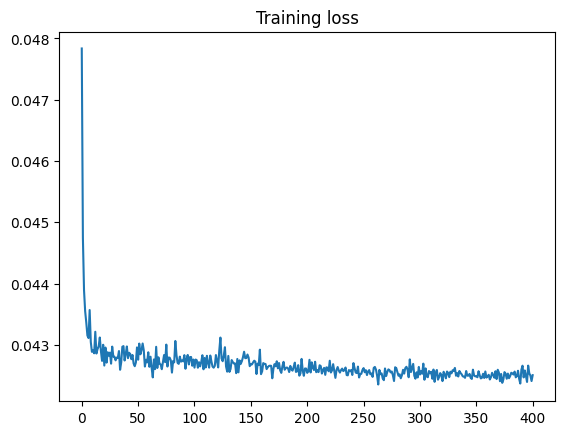

In [ ]:
plt.plot(train_losses)
plt.title("Training loss")

In [ ]:
torch.cuda.empty_cache()

# 3D VAE-GAN Model

In [ ]:
import numpy as np
import torch
import os
from torch import nn
from torch import optim
from torch.nn import functional as F

class Discriminator(nn.Module):
    def __init__(self, channel=512,out_class=1):
        super(Discriminator, self).__init__()

        self.channel = channel
        n_class = out_class

        self.conv1 = nn.Conv3d(1, channel//8, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv3d(channel//8, channel//4, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm3d(channel//4)
        self.conv3 = nn.Conv3d(channel//4, channel//2, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm3d(channel//2)
        self.conv4 = nn.Conv3d(channel//2, channel, kernel_size=4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm3d(channel)
        self.conv5 = nn.Conv3d(channel, n_class, kernel_size=4, stride=1, padding=0)


    def forward(self, x):
        batch_size = x.size()[0]
        h1 = F.leaky_relu(self.conv1(x), negative_slope=0.2)
        h2 = F.leaky_relu(self.bn2(self.conv2(h1)), negative_slope=0.2)
        h3 = F.leaky_relu(self.bn3(self.conv3(h2)), negative_slope=0.2)
        h4 = F.leaky_relu(self.bn4(self.conv4(h3)), negative_slope=0.2)
        h5 = self.conv5(h4)
        output = F.sigmoid(h5.view(h5.size()[0],-1))
        return output

class Encoder(nn.Module):
    def __init__(self, channel=512,out_class=1):
        super(Encoder, self).__init__()

        self.channel = channel
        n_class = out_class

        self.conv1 = nn.Conv3d(1, channel//8, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv3d(channel//8, channel//4, kernel_size=4, stride=2, padding=1)
        self.bn2 = nn.BatchNorm3d(channel//4)
        self.conv3 = nn.Conv3d(channel//4, channel//2, kernel_size=4, stride=2, padding=1)
        self.bn3 = nn.BatchNorm3d(channel//2)
        self.conv4 = nn.Conv3d(channel//2, channel, kernel_size=4, stride=2, padding=1)
        self.bn4 = nn.BatchNorm3d(channel)

        self.mean = nn.Sequential(
            nn.Linear(32768, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 1000))
        self.logvar = nn.Sequential(
            nn.Linear(32768, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, 1000))

    def forward(self, x, _return_activations=False):
        batch_size = x.size()[0]
        h1 = F.leaky_relu(self.conv1(x), negative_slope=0.2)
        h2 = F.leaky_relu(self.bn2(self.conv2(h1)), negative_slope=0.2)
        h3 = F.leaky_relu(self.bn3(self.conv3(h2)), negative_slope=0.2)
        h4 = F.leaky_relu(self.bn4(self.conv4(h3)), negative_slope=0.2)

        mean = self.mean(h4.view(batch_size,-1))
        logvar = self.logvar(h4.view(batch_size,-1))

        std = logvar.mul(0.5).exp_()
        reparametrized_noise = Variable(torch.randn((batch_size, 1000))).cuda()
        reparametrized_noise = mean + std * reparametrized_noise
        return mean,logvar ,reparametrized_noise

class Generator(nn.Module):
    def __init__(self, noise:int=100, channel:int=64):
        super(Generator, self).__init__()
        _c = channel

        self.noise = noise
        self.fc = nn.Linear(1000,512*4*4*4)
        self.bn1 = nn.BatchNorm3d(_c*8)

        self.tp_conv2 = nn.Conv3d(_c*8, _c*4, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm3d(_c*4)

        self.tp_conv3 = nn.Conv3d(_c*4, _c*2, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn3 = nn.BatchNorm3d(_c*2)

        self.tp_conv4 = nn.Conv3d(_c*2, _c, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn4 = nn.BatchNorm3d(_c)

        self.tp_conv5 = nn.Conv3d(_c, 1, kernel_size=3, stride=1, padding=1, bias=False)

    def forward(self, noise):
        noise = noise.view(-1, 1000)
        h = self.fc(noise)
        h = h.view(-1,512,4,4,4)
        h = F.relu(self.bn1(h))

        h = F.upsample(h,scale_factor = 2)
        h = self.tp_conv2(h)
        h = F.relu(self.bn2(h))

        h = F.upsample(h,scale_factor = 2)
        h = self.tp_conv3(h)
        h = F.relu(self.bn3(h))

        h = F.upsample(h,scale_factor = 2)
        h = self.tp_conv4(h)
        h = F.relu(self.bn4(h))

        h = F.upsample(h,scale_factor = 2)
        h = self.tp_conv5(h)

        h = F.tanh(h)

        return h

## GAN Model Training

In [ ]:
# resize fmri
train_f_gan = []
for f in train_f:
  f = resize_volume(f, 64, 64, 64)
  train_f_gan.append(f)

train_f_gan = np.stack(np.array(train_f_gan), axis=0)

In [ ]:
import numpy as np
import torch
import os
import time
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch import autograd
from torch.autograd import Variable
import nibabel as nib
from torch.utils.data.dataset import Dataset
from nilearn import plotting
from pathlib import Path
from dataset import MRIDataset
from tensorboardX import SummaryWriter
import argparse
import matplotlib.pyplot as plt
torch.autograd.set_detect_anomaly(True)


BATCH_SIZE=4
gpu = True
workers = 1
LAMBDA= 10
_eps = 1e-15

Use_BRATS = False
Use_ATLAS = False

gamma = 20
beta = 10

#setting latent variable sizes
latent_dim = 1000
lr_g = 0.0001
lr_e = 0.0001
lr_d = 0.0001

# Need to resize to (64, 64, 64)
dataset = torch.utils.data.TensorDataset(train_f_gan)

def inf_train_gen(data_loader):
    while True:
        for _,images in enumerate(data_loader):
            assert images.shape[1:] == (1,144,192,144)
            yield images

def train(args):
    print("Training VAE GAN hyperparameters: ")
    print('lr_g: {:<8.3}'.format(lr_g),
          'lr_e: {:<8.3}'.format(lr_e),
          'lr_d: {:<8.3}'.format(lr_d),
          'g_iter: {}'.format(g_iter),
          'latent_dim: {}'.format(latent_dim),
          'batch_size: {}'.format(batch_size)
        )
    train_loader = torch.utils.data.DataLoader(train_dataloader,batch_size=args.batch_size,
                                          shuffle=True,num_workers=workers)
    G = Generator(noise = latent_dim)
    D = Discriminator()
    E = Encoder()

    G.cuda()
    D.cuda()
    E.cuda()


    g_optimizer = optim.Adam(G.parameters(), lr=lr_g)
    d_optimizer = optim.Adam(D.parameters(), lr=lr_d)
    e_optimizer = optim.Adam(E.parameters(), lr=lr_e)

    real_y = Variable(torch.ones((args.batch_size, 1)).cuda())
    fake_y = Variable(torch.zeros((args.batch_size, 1)).cuda())

    criterion_bce = nn.BCELoss()
    criterion_l1 = nn.L1Loss()
    criterion_mse = nn.MSELoss()

    gen_load = inf_train_gen(train_loader)

    for iteration in range(args.continue_iter, args.iter):
        # print("....Iterating....")
        for step, real_images in enumerate(train_loader):
            _batch_size = real_images.size(0)
            real_images = Variable(real_images,requires_grad=False).cuda()
            z_rand = Variable(torch.randn((_batch_size, latent_dim)),requires_grad=False).cuda()
            mean,logvar,code = E(real_images)
            x_rec = G(code)
            assert x_rec.shape == real_images.shape
            x_rand = G(z_rand)
            ###############################################
            # Train D
            ###############################################
            d_optimizer.zero_grad()

            d_real_loss = criterion_bce(D(real_images),real_y[:_batch_size])
            d_recon_loss = criterion_bce(D(x_rec), fake_y[:_batch_size])
            d_fake_loss = criterion_bce(D(x_rand), fake_y[:_batch_size])

            dis_loss = d_recon_loss+d_real_loss + d_fake_loss
            dis_loss.backward(retain_graph=True)

            d_optimizer.step()

            ###############################################
            # Train G
            ###############################################
            g_optimizer.zero_grad()
            output = D(real_images)
            d_real_loss = criterion_bce(output,real_y[:_batch_size])
            output = D(x_rec)
            d_recon_loss = criterion_bce(output,fake_y[:_batch_size])
            output = D(x_rand)
            d_fake_loss = criterion_bce(output,fake_y[:_batch_size])

            d_img_loss = d_real_loss + d_recon_loss+ d_fake_loss
            gen_img_loss = -d_img_loss

            rec_loss = ((x_rec - real_images)**2).mean()

            err_dec = gamma* rec_loss + gen_img_loss

            err_dec.backward(retain_graph=True)
            g_optimizer.step()

            ###############################################
            # Train E
            ###############################################
            prior_loss = 1+logvar-mean.pow(2) - logvar.exp()
            prior_loss = (-0.5*torch.sum(prior_loss))/torch.numel(mean.data)
            rec_loss = ((G(code) - real_images)**2).mean()
            err_enc = prior_loss + beta*rec_loss # TODO: ?????

            e_optimizer.zero_grad()
            err_enc.backward()
            e_optimizer.step()
            # TODO: moved g_optimizer here according to
            # https://discuss.pytorch.org/t/runtimeerror-one-of-the-variables-needed-for-gradient-computation-has-been-modified-by-an-inplace-operation-code-worked-in-pytorch-1-2-but-not-in-1-5-after-updating/87327/4
            # g_optimizer.step()
        # print("Finished one iteration")

        if (iteration+1) % 5 == 0:
            end = time.time()
            duration = int(end - start)
            print('[{}/{}]'.format(iteration,MAX_ITER),
                'D: {:<8.3}'.format(dis_loss.item()),
                'En: {:<8.3}'.format(err_enc.item()),
                'De: {:<8.3}'.format(err_dec.item()),
                )


In [ ]:
train()